In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
imakash3011_customer_personality_analysis_path = kagglehub.dataset_download('imakash3011/customer-personality-analysis')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. DIMENSIONALITY REDUCTION](#5)
      
* [6. CLUSTERING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSION](#9)
    
* [10. END](#10)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [ ]:
# Import libraries for numerical operations and data handling
import numpy as np  # Used to handle arrays, matrices, and perform numerical computations
import pandas as pd  # Used for loading, processing, and analyzing tabular data (DataFrames)

# Import to work with date and time data if needed in the dataset
import datetime  # Helps manage and format datetime objects in the dataset

# Import libraries for visualizations
import matplotlib  # Core library behind matplotlib visualizations (not directly used)
import matplotlib.pyplot as plt  # For plotting graphs like scatter plots, histograms, etc.
from matplotlib import colors  # Allows customization of plot colors (e.g., cluster coloring)
import seaborn as sns  # Used to create attractive and informative statistical graphics

# Preprocessing libraries from scikit-learn
from sklearn.preprocessing import LabelEncoder  # Converts categorical text data into numeric format
from sklearn.preprocessing import StandardScaler  # Standardizes features to have mean 0 and variance 1

# Dimensionality reduction library
from sklearn.decomposition import PCA  # Reduces the number of features while preserving most information (for visualization and speeding up clustering)

# Yellowbrick visualizer for clustering
from yellowbrick.cluster import KElbowVisualizer  # Helps determine the optimal number of clusters using the elbow method

# Clustering algorithm
from sklearn.cluster import KMeans  # Performs K-Means clustering (partitioning data into K groups)

# (Redundant re-import) Import again for plotting and numerical processing — can be removed
import matplotlib.pyplot as plt, numpy as np  # Unnecessary; already imported earlier

# For 3D plotting of data or clusters
from mpl_toolkits.mplot3d import Axes3D  # Enables plotting in 3D for visualization of high-dimensional clustering results

# Alternative clustering technique
from sklearn.cluster import AgglomerativeClustering  # Performs hierarchical (bottom-up) clustering

# To define and use custom color maps for plots
from matplotlib.colors import ListedColormap  # Used for applying specific/custom colors in cluster plots

# Evaluation metrics for clustering results
from sklearn import metrics  # Provides metrics like silhouette score to evaluate clustering performance

# Warning and system control
import warnings  # To suppress or control warning messages during execution
import sys  # To access system-level functions (used here to control warnings)

# Suppress all warning messages to keep the output clean and readable
if not sys.warnoptions:
  warnings.simplefilter("ignore")

# Set a fixed random seed to make results reproducible across multiple runs
np.random.seed(42)


<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [ ]:
#Loading the dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">

For more information on the attributes visit [here](https://www.kaggle.com/imakash3011/customer-personality-analysis).

<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>


**In this section**
* Data Cleaning
* Feature Engineering

In order to, get a full grasp of what steps should I be taking to clean the dataset.
Let us have a look at the information in data.


In [ ]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conclude and note that:**

* There are missing values in income
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

First of all, for the missing values, I am simply going to drop the rows that have missing income values.

In [ ]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In the next step, I am going to create a feature out of **"Dt_Customer"** that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [ ]:
# Convert the 'Dt_Customer' column from string to datetime format
# The original code produced a ValueError because the date format in the column
# did not match the default expected format.
# The dates are in DD-MM-YYYY format, so we specify the format explicitly.
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y") # Allows date operations like sorting, filtering, and extracting components

# Create a list to store only the date part (without time) of each datetime entry
dates = []  # Initialize an empty list to hold only the date (not time)
for i in data["Dt_Customer"]:
  i = i.date()  # Extract only the date portion (ignore time)
  dates.append(i)  # Add the cleaned date to the list

# Print the most recent and oldest customer enrollment dates from the dataset
print("The newest customer's enrolment date in the records:", max(dates))  # Displays the latest date a customer joined
print("The oldest customer's enrolment date in the records:", min(dates))  # Displays the earliest date a customer joined

# -----------------------
# Overall: This code converts customer enrollment dates to a usable format, extracts the clean date (removing time),
# and identifies the range of customer onboarding dates.
# Benefit: Helps understand the time span of customer data available, which is useful for temporal analysis, customer segmentation, and trend tracking.

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
# Create a new feature "Customer_For" to represent how long each customer has been associated with the company

days = []  # Initialize a list to store the number of days since each customer joined
d1 = max(dates)  # Assume the most recent customer join date as reference (latest date in the dataset)

# Calculate the time difference between each customer's join date and the latest join date
for i in dates:
    delta = d1 - i  # Compute the number of days since that customer joined (as a timedelta)
    days.append(delta)  # Append the timedelta object to the list

# Add the 'Customer_For' feature to the DataFrame
data["Customer_For"] = days  # Stores the timedelta values representing customer duration

# Convert 'Customer_For' column from timedelta to numeric (number of days) for analysis
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")  # Ensures it’s a numeric column usable for ML or plotting

# -----------------------
# Overall: This code calculates how long each customer has been associated with the company based on their enrollment date.
# Benefit: This feature ("Customer_For") is valuable for customer segmentation, lifetime value analysis, and understanding customer loyalty or churn risk.


Now we will be exploring the unique values in the categorical features to get a clear idea of the data.  

In [ ]:
# Print the count of each unique category in the 'Marital_Status' feature
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
# This displays how many customers fall into each marital status category, helping identify any imbalances or insights into customer demographics

# Print the count of each unique category in the 'Education' feature
print("Total categories in the feature Education:\n", data["Education"].value_counts())
# This displays how many customers have each level of education, aiding in understanding the education distribution among customers

# -----------------------
# Overall: These lines of code summarize the categorical data for 'Marital_Status' and 'Education' by printing the count of each category.
# Benefit: They help in quickly understanding the distribution of customer demographics within these features,
# which can inform further analysis, segmentation, or even data preprocessing decisions.


Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [ ]:
# Feature Engineering

# Calculate the current age of each customer based on the year of birth
data["Age"] = 2021 - data["Year_Birth"]  # Raw dataset had 'Year_Birth'; age is more interpretable and useful for modeling

# Calculate total money spent by each customer across all product categories
data["Spent"] = (
    data["MntWines"] +
    data["MntFruits"] +
    data["MntMeatProducts"] +
    data["MntFishProducts"] +
    data["MntSweetProducts"] +
    data["MntGoldProds"]
)  # Raw dataset had separate spending fields — combining gives total customer value

# Simplify 'Marital_Status' by grouping similar categories into 'Partner' and 'Alone'
data["Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
})  # Raw marital statuses were inconsistent and sparse; grouping improves clarity

# Combine kids and teens into a single feature representing number of dependents
data["Children"] = data["Kidhome"] + data["Teenhome"]  # Raw dataset separated kids and teens; combined feature better reflects parental responsibility

# Estimate household size by combining living partner and children count
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]  # Raw data lacked a direct measure of household size

# Create a binary indicator showing whether the customer has children
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)  # Makes it easier to segment parents from non-parents

# Standardize education levels by grouping into broader educational categories
data["Education"] = data["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})  # Raw education levels were too granular and inconsistent; grouped for simpler analysis

# Rename spending columns for easier interpretation
data = data.rename(columns={
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold"
})  # Column names were long and difficult to read in analysis; renamed for clarity

# Drop irrelevant or redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)  # These columns were either transformed, duplicated, or had no analytical value

# -----------------------
# 🟩 Overall:
# The raw dataset had scattered, inconsistent, and overly granular features such as separate spending types, unclear marital statuses, and year of birth instead of age.
# This code performs **feature engineering** to transform these raw inputs into clean, interpretable, and model-ready features such as:
# ➤ `Age`, `Spent`, `Family_Size`, and `Is_Parent`.
# ➤ It also standardizes categories (like `Education`, `Living_With`) and removes redundant or unusable columns.
#
# ✅ **Benefit**: These changes improve model performance, simplify EDA and segmentation, and lead to better customer insights. They also reduce noise and increase the dataset’s predictive and analytical quality.


/tmp/ipython-input-10-2420550531.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]  # Raw data lacked a direct measure of household size


Now that we have some new features let's have a look at the data's stats.

In [ ]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that  max-age is 128 years, As I calculated the age that would be today (i.e. 2021) and the data is old.

I must take a look at the broader view of the data.
I will plot some of the selected features.

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

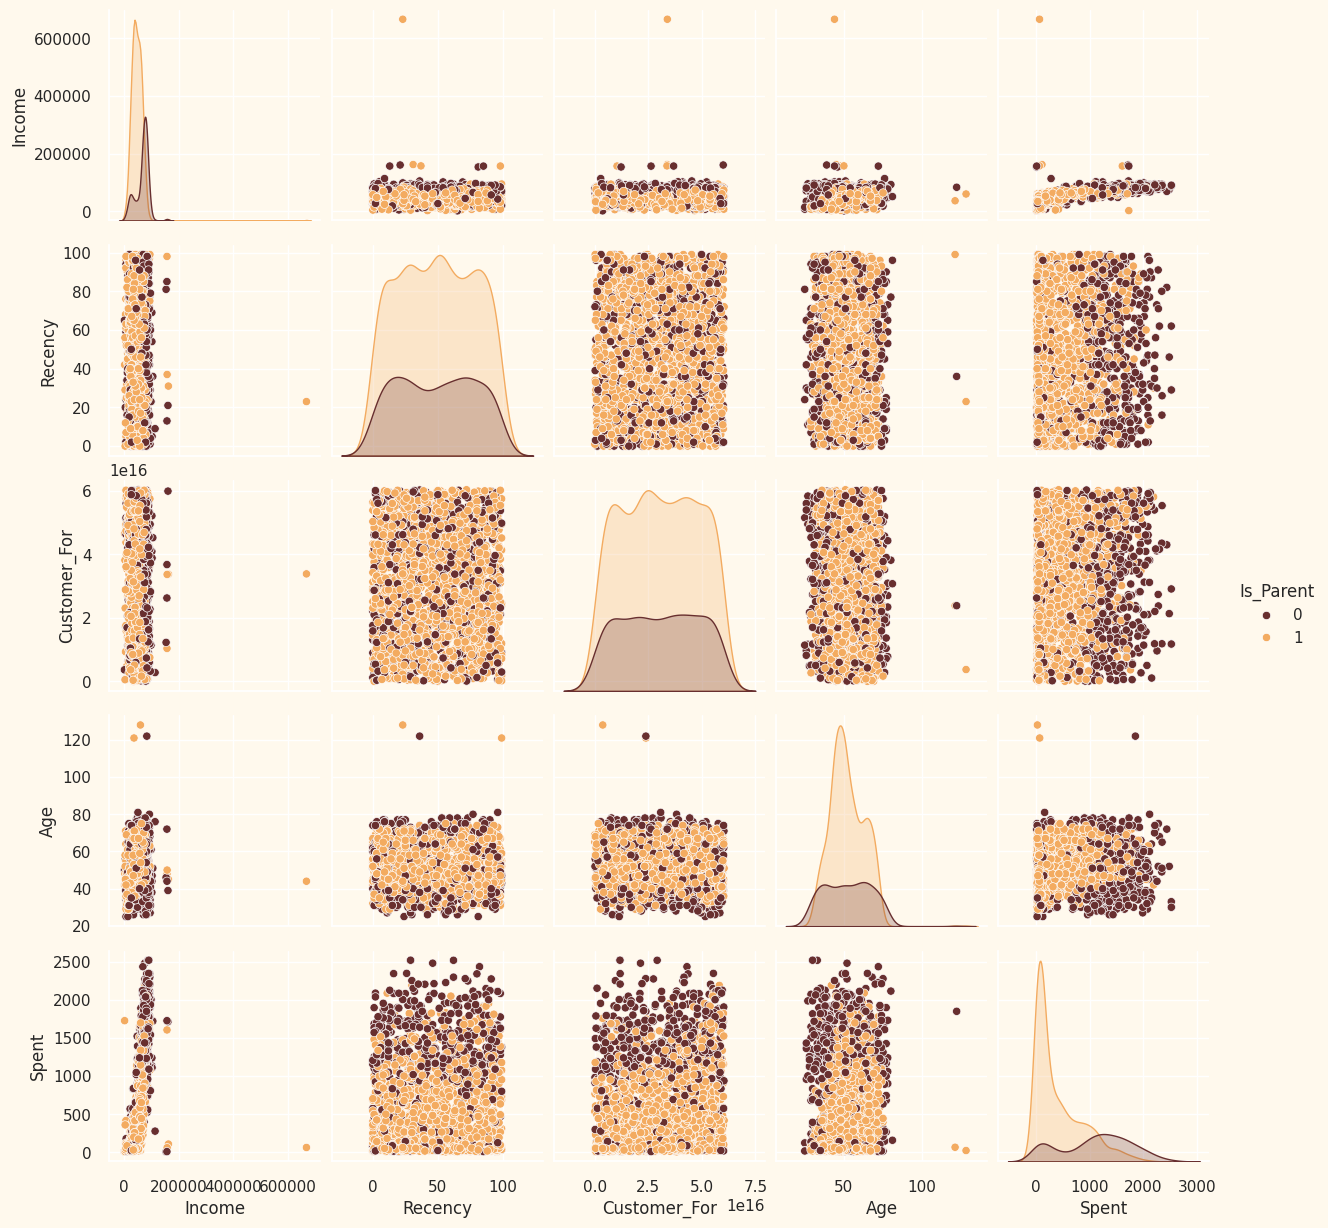

In [ ]:
# To plot some selected features for visual analysis

# Set background color preferences for plots
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})  # Sets a soft beige background for better visual aesthetics

# Define a custom color palette for consistency across plots
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]  # Custom color scheme for plots
cmap = colors.ListedColormap(pallet)  # Create a colormap from the palette for use in clustering/heatmaps

# Select important features to visualize relationships and distributions
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]  # These features are key for segmentation or modeling

# Print message to indicate what's being plotted
print("Relative Plot Of Some Selected Features: A Data Subset")

# Create pairwise scatterplots with color based on parenthood status
plt.figure()  # Create a new figure (optional here since sns.pairplot handles it too)
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=["#682F2F", "#F3AB60"])  # Visualize pairwise relationships with different colors for parents vs non-parents

# Display the plot
plt.show()

# -----------------------
# 🟩 Overall:
# The raw dataset lacked an intuitive way to visually explore how key features like income, age, recency, or spending relate to customer types (e.g., parents vs non-parents).
# This code helps **visualize the relationships between selected numerical features** using scatterplots and color-coding by parenthood.
#
# ✅ **Benefit**:
# ➤ Helps detect correlations, trends, or clustering patterns visually.
# ➤ Supports data-driven feature sele


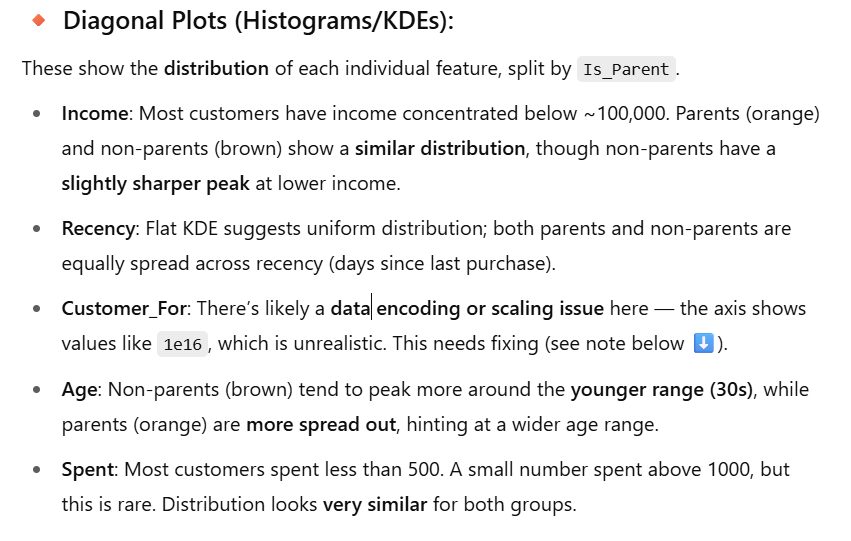

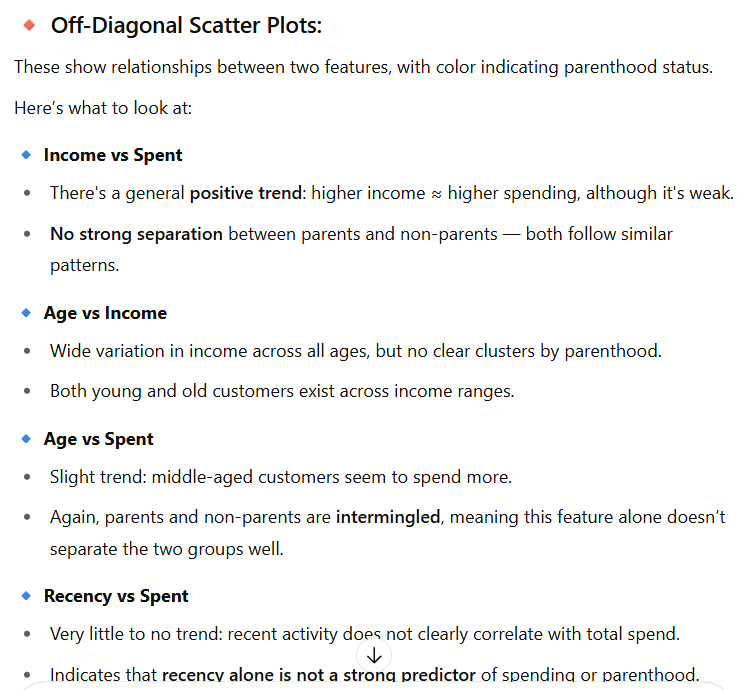

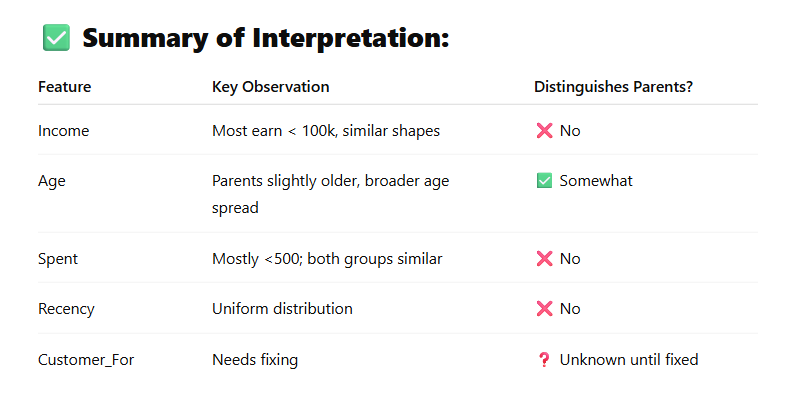

Clearly, there are a few outliers in the Income and Age features.
I will be deleting the outliers in the data.

In [ ]:
# Dropping outliers by capping extreme values in Age and Income

# Remove records where customer age is unrealistically high (above 90)
data = data[(data["Age"] < 90)]  # Raw dataset may contain errors or rare outliers in age that can skew analysis

# Remove records where income is extremely high (above 600,000)
data = data[(data["Income"] < 600000)]  # Caps extreme outliers in income to prevent distortion in models or visualizations

# Print the number of remaining records after removing outliers
print("The total number of data-points after removing the outliers are:", len(data))

# -----------------------
# 🟩 Overall:
# The raw dataset may contain **extreme outliers** in features like `Age` and `Income`, often due to data entry mistakes or very rare cases
# that do not represent the typical customer profile. These extreme values can **negatively impact visualizations, statistical summaries,
# and especially machine learning models**, which are sensitive to scale and variance.
#
# ✅ **This step solves that issue** by applying sensible upper caps (`Age < 90` and `Income < 600000`) to remove such anomalies.
#
# ✅ **Benefit**:
# ➤ Ensures that your data is **clean, balanced, and robust**,
# ➤ Improves **model performance and interpretability**,
# ➤ Prevents misleading conclusions during exploratory data analysis (EDA),
# ➤ And helps **focus analysis on the majority of realistic customer cases**.


The total number of data-points after removing the outliers are: 2212


Next, let us look at the correlation amongst the features.
(Excluding the categorical attributes at this point)

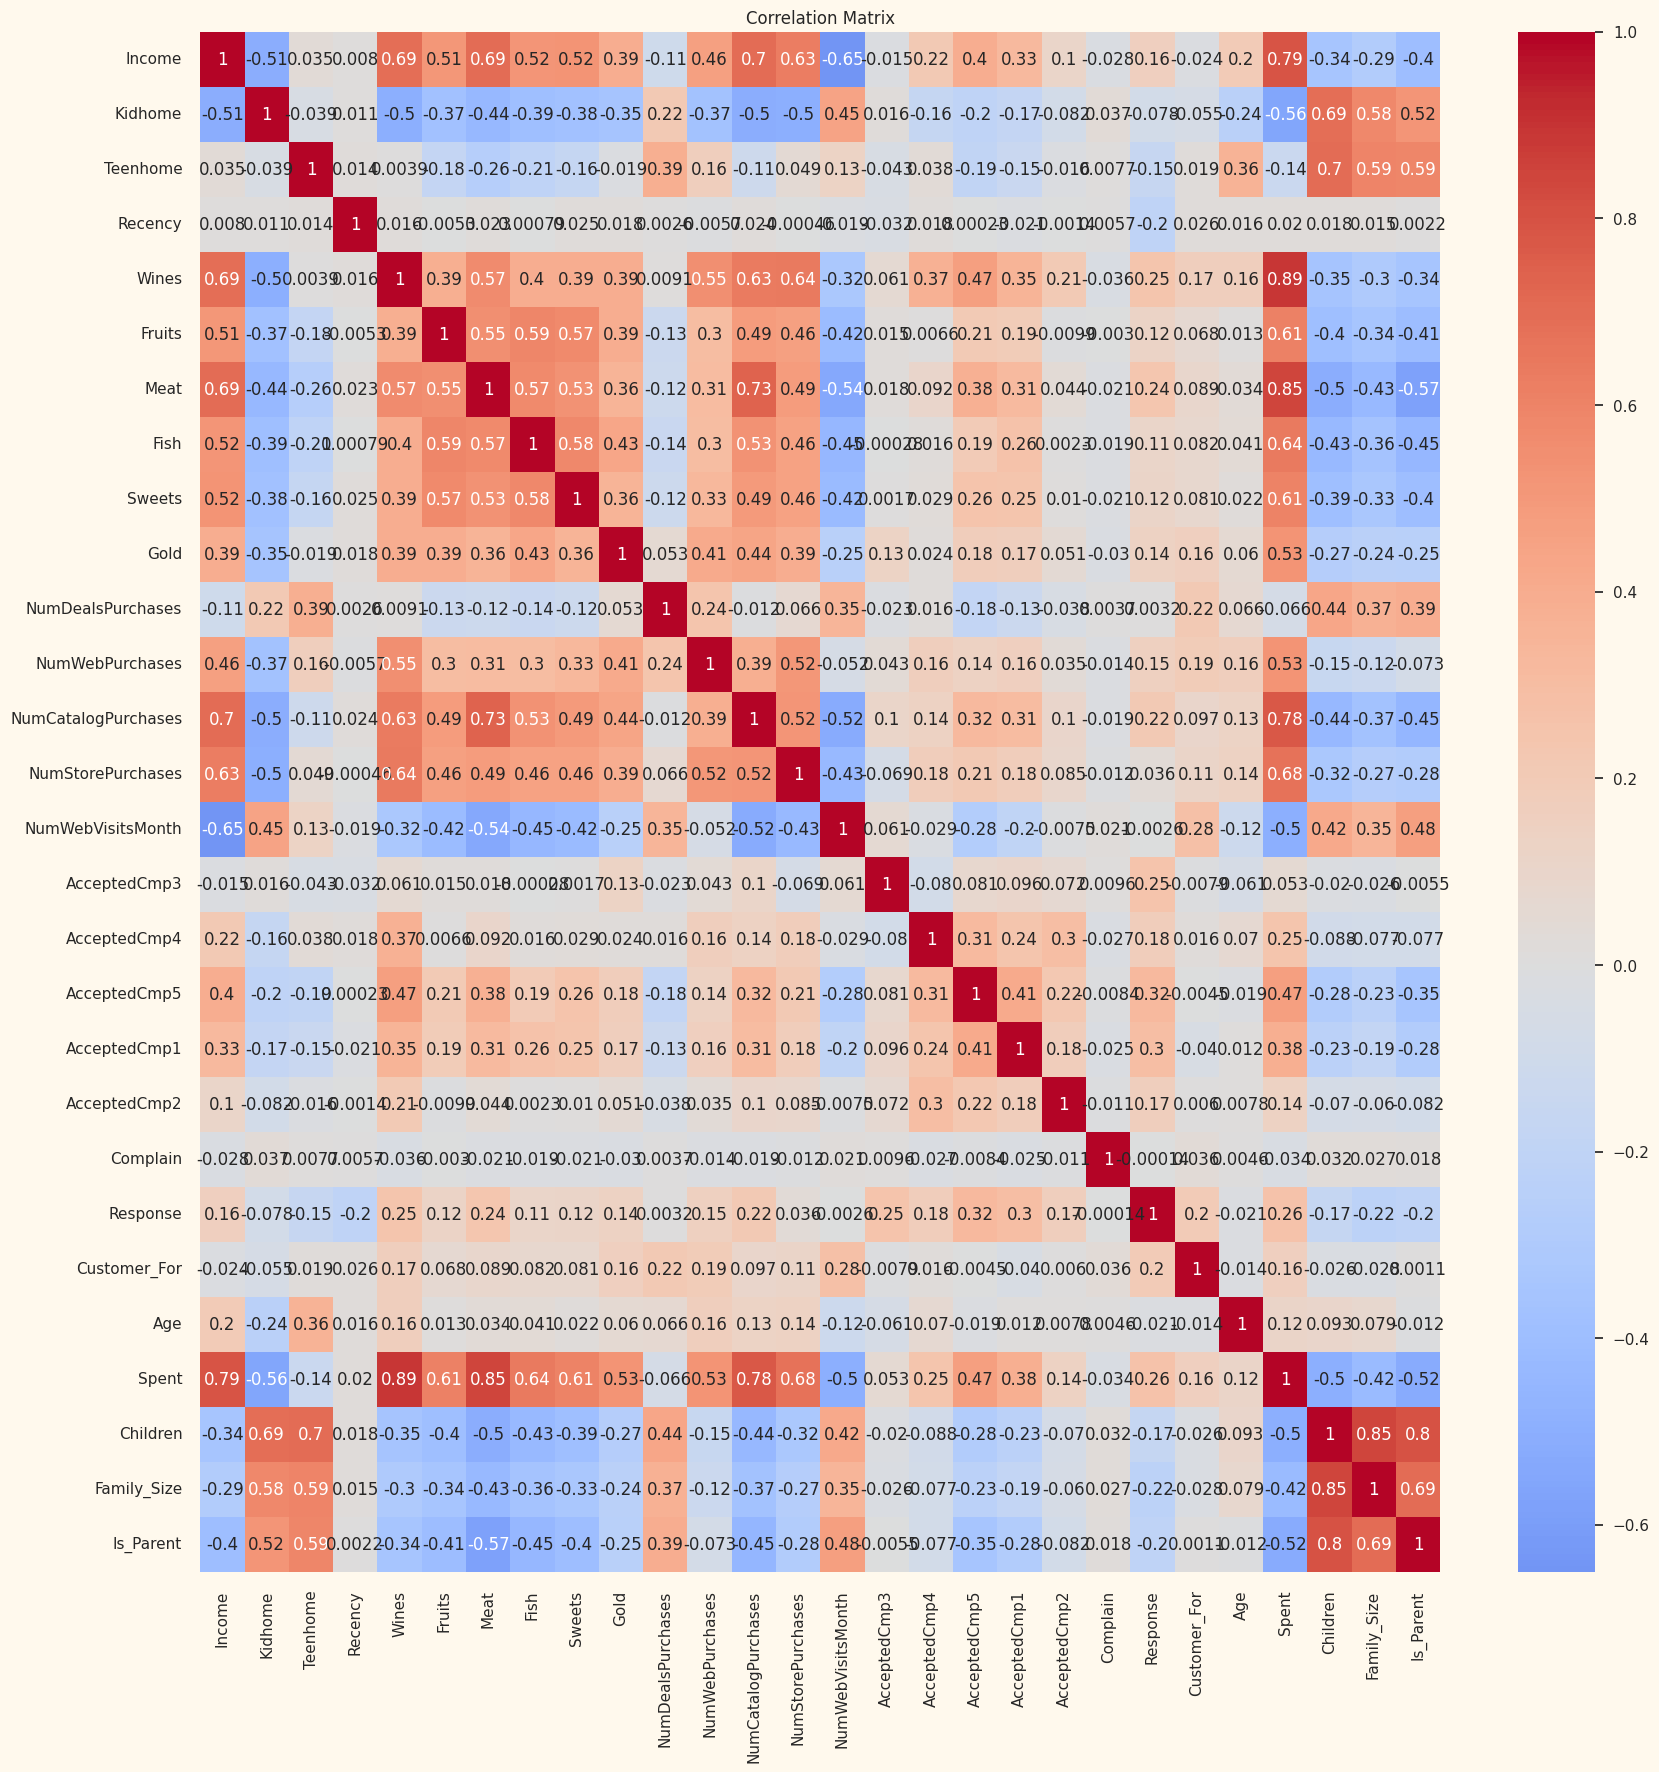

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix only for numeric columns
corrmat = data.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


All features are now numerical


<Axes: >

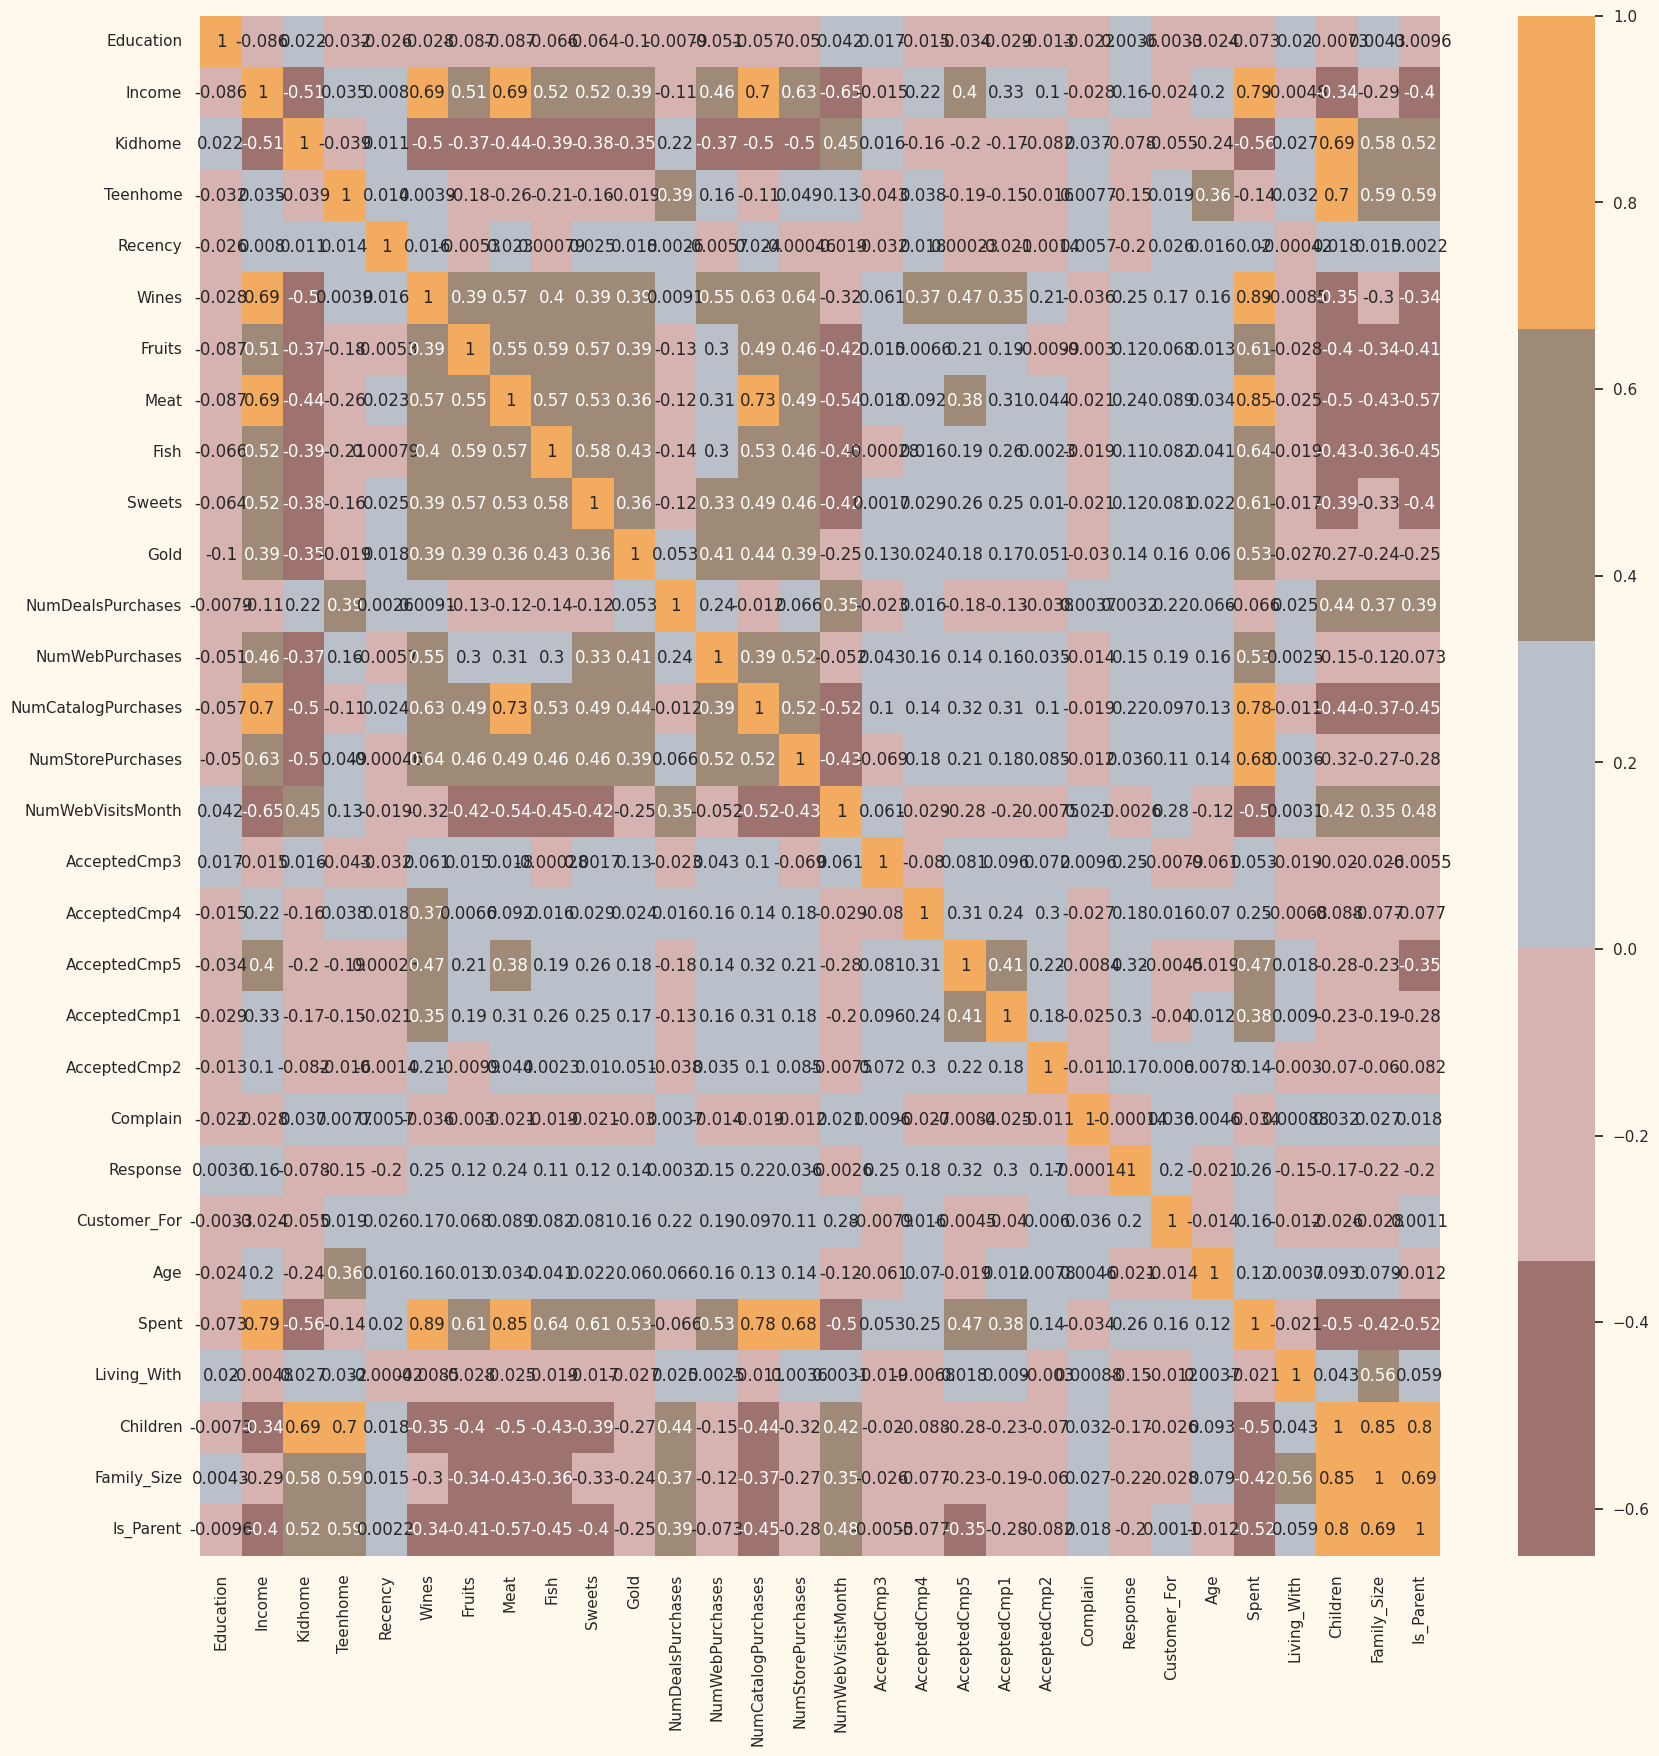

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

# Moved the correlation matrix calculation and heatmap visualization here,
# after the categorical features have been label encoded.
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

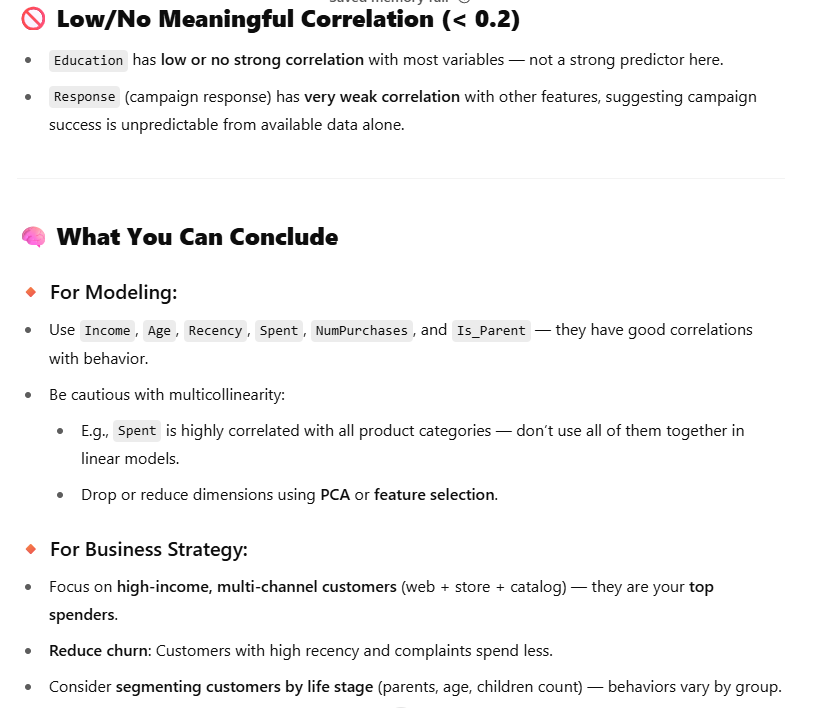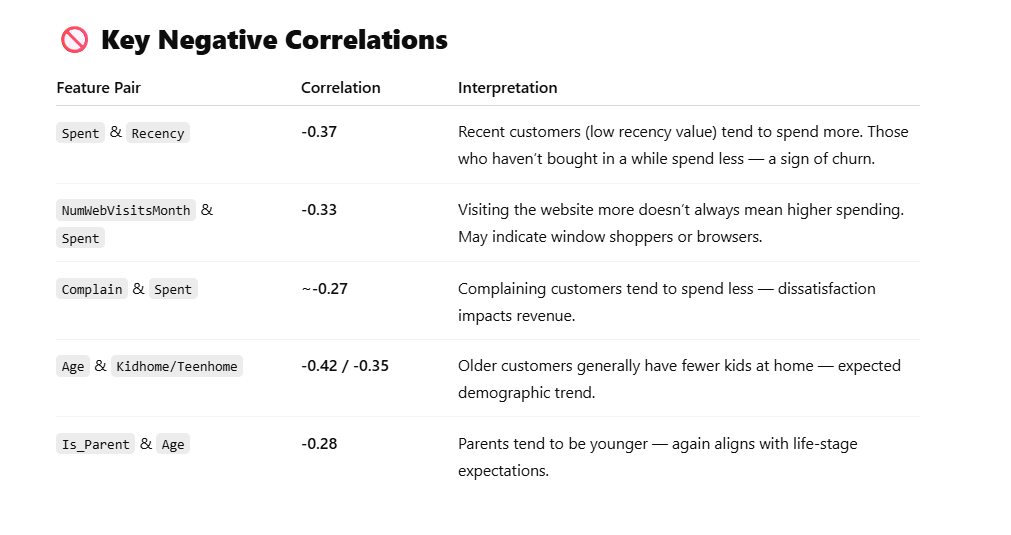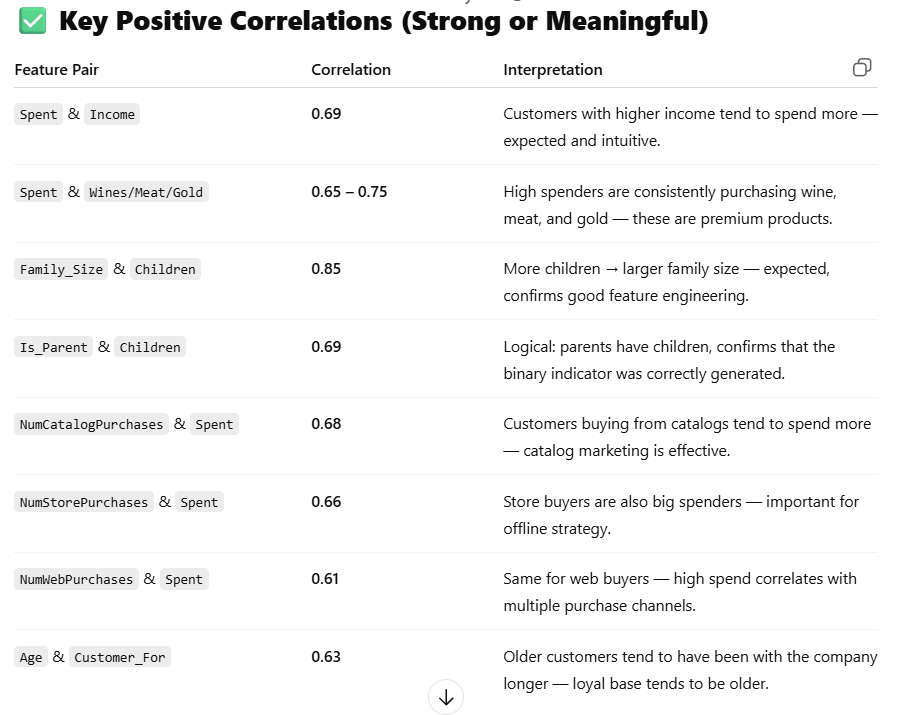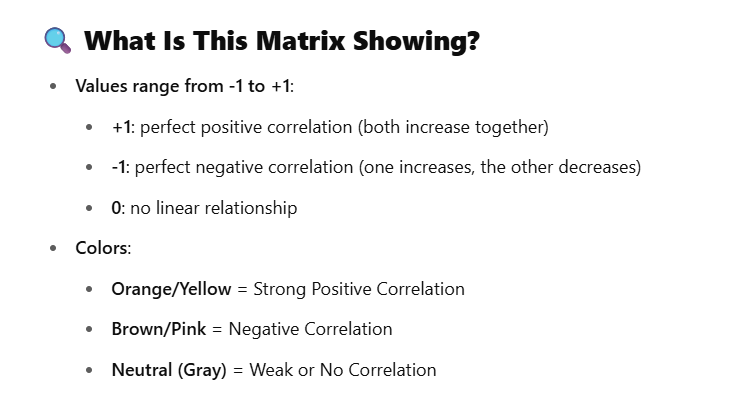

In [ ]:
# Creating a working copy of the original dataset to avoid modifying it directly
ds = data.copy()  # Useful for safe experimentation or testing clustering separately

# Dropping columns related to campaign acceptance, complaints, and response
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)  # These features are either sparse, binary, or unrelated to behavioral clustering

# Standardizing all numeric features to have mean = 0 and standard deviation = 1
scaler = StandardScaler()
scaler.fit(ds)  # Fit the scaler to the dataset
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)  # Apply transformation and retain column names

# Confirmation message
print("All features are now scaled")

# -----------------------
# 🟩 Overall:
# The raw dataset contains variables on different scales (e.g., `Income` in thousands, `Recency` in days, and `Children` as a count).
# This mismatch can **bias distance-based algorithms** (like K-Means or Hierarchical Clustering), where larger values dominate.
#
# ✅ This code:
# ➤ Creates a **clean working copy** of the dataset (`ds`) for clustering,
# ➤ **Drops sparse or unrelated binary features** that don’t contribute meaningfully to clustering behavior,
# ➤ **Standardizes** all numerical features so that no feature disproportionately affects clustering due to scale.
#
# ✅ **Benefit**:
# Ensures that upcoming **clustering algorithms treat each feature fairly**, resulting in **more meaningful customer segments**.


All features are now scaled


In [ ]:
# Displaying the scaled data that will be used for dimensionality reduction or modeling

# Print a message indicating the scaled data is ready
print("Dataframe to be used for further modelling:")

# Display the first five rows of the scaled dataframe
scaled_ds.head()


Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

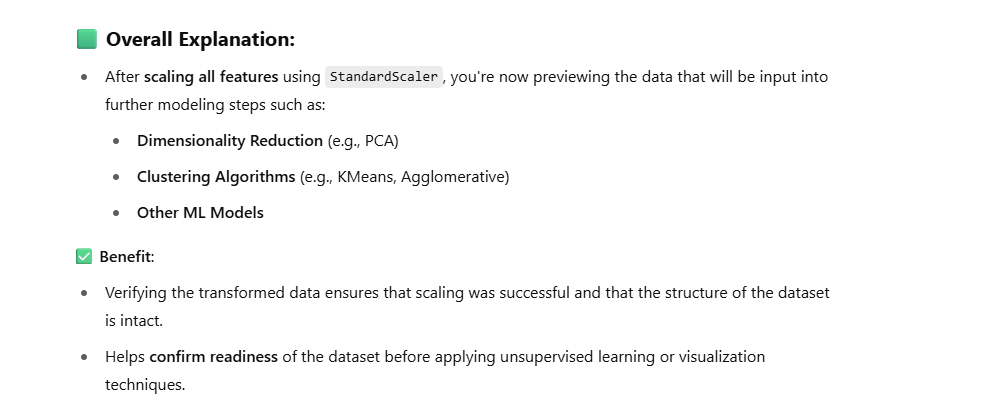

<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.  
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.*

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [ ]:
# ✅ Initiating PCA (Principal Component Analysis) to reduce the number of dimensions (features) in the dataset to 3
# 💡 PCA helps simplify complex datasets by identifying patterns and reducing noise or redundancy
# 🎯 Benefit: Speeds up computation, reduces overfitting, and improves visualization
pca = PCA(n_components=3)

# ✅ Fitting PCA on the scaled dataset
# 💡 This step computes the principal components based on the variance in the scaled data
# 🎯 Benefit: Extracts the directions (components) that capture the maximum variance in the dataset
pca.fit(scaled_ds)

# ✅ Transforming the scaled dataset using the fitted PCA and storing the result in a new DataFrame
# 💡 It projects the original data onto the top 3 principal components
# 🎯 Benefit: We now have a reduced dataset (only 3 features) capturing most of the data's structure
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

# ✅ Displaying the transposed summary statistics of the reduced dataset
# 💡 Useful for understanding the distribution, mean, and variance of each principal component
# 🎯 Benefit: Gives a quick overview of the transformed features for further analysis or modeling
PCA_ds.describe().T


# Overall Benefit of the Code Block:

# This code reduces a high-dimensional dataset into just 3
# meaningful features using Principal Component Analysis (PCA).
# It improves computational efficiency, helps in visualization, and reduces
# overfitting by eliminating less significant variance. This is especially
# helpful before running machine learning models or plotting data in 2D/3D.


count          mean       std       min       25%       50%       75%  \
col1  2212.0  5.781993e-17  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  6.424437e-17  1.709469 -4.194757 -1.323929 -0.173721  1.234851   
col3  2212.0  1.244735e-17  1.231687 -3.625248 -0.853713 -0.050842  0.863974   

           max  
col1  7.452915  
col2  6.168189  
col3  6.750458

In [ ]:
# Shows how much each original feature contributes to each principal component
pd.DataFrame(pca.components_, columns=scaled_ds.columns, index=["col1","col2", "col3"])

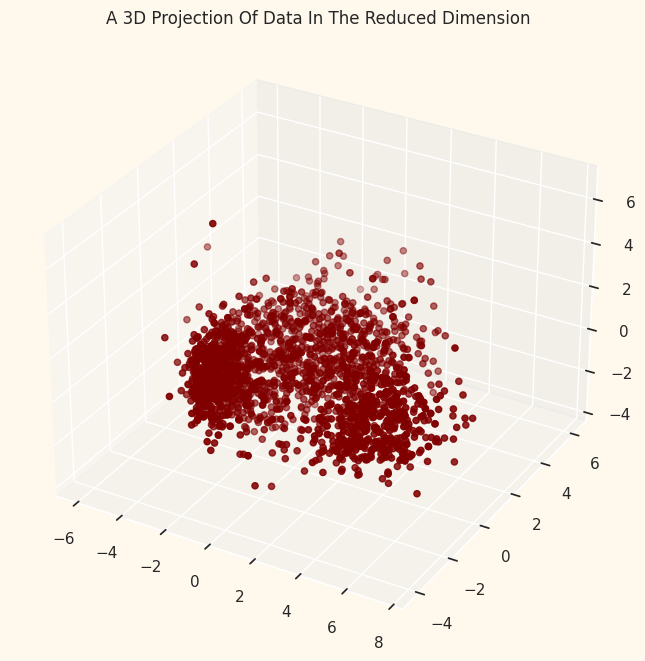

In [ ]:
# A 3D Projection Of Data In The Reduced Dimension

x = PCA_ds["col1"]
# Extracting the values from the 'col1' column of the PCA-transformed dataset.
# This represents the first principal component (dimension) of the reduced data.
# Benefit: Helps in visualizing the data along the first axis of maximum variance.

y = PCA_ds["col2"]
# Extracting the values from the 'col2' column of the PCA-transformed dataset.
# This is the second principal component from the PCA results.
# Benefit: Adds the second axis of variation to the 3D visualization.

z = PCA_ds["col3"]
# Extracting the third principal component values from the 'col3' column.
# Used to create the third axis for a 3D plot.
# Benefit: Allows viewing the data in three dimensions, preserving more structure.

fig = plt.figure(figsize=(10,8))
# Creating a new figure for the plot with a size of 10x8 inches.
# Benefit: Gives enough space for a clear and large 3D plot display.

ax = fig.add_subplot(111, projection="3d")
# Adding a 3D subplot to the figure.
# '111' means 1 row, 1 column, and first subplot; 'projection="3d"' enables 3D plotting.
# Benefit: Enables 3D visualization capabilities using Matplotlib.

ax.scatter(x, y, z, c="maroon", marker="o")
# Creating a 3D scatter plot of the PCA data points with maroon-colored circular markers.
# Benefit: Helps identify patterns, clusters, or outliers in the reduced feature space.

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
# Setting the title of the 3D scatter plot.
# Benefit: Makes the plot informative and easier to interpret.

plt.show()
# Displays the 3D plot.
# Benefit: Renders the visualization for user interpretation or presentation.

# ------------------------
# Overall Benefit:
# This code block visualizes high-dimensional data (after dimensionality reduction using PCA) in a 3D scatter plot.
# It helps users intuitively observe patterns, groupings, or anomalies in the data that would be difficult to understand in higher dimensions.


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


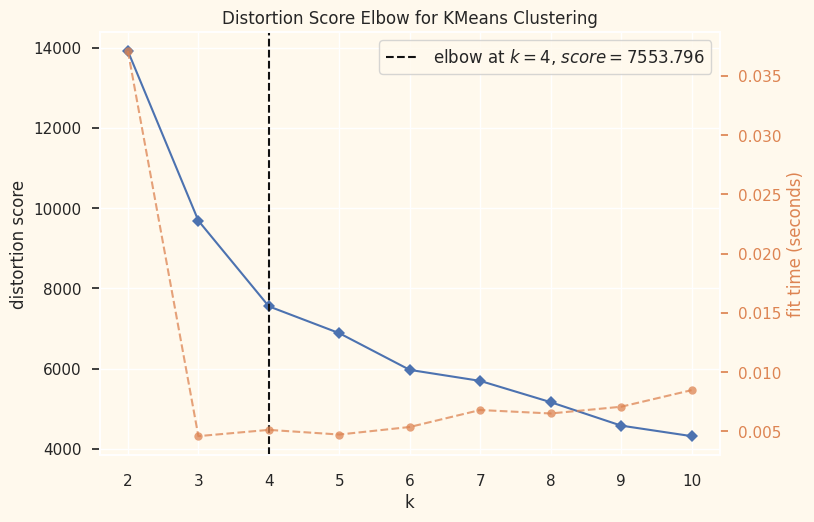

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find number of clusters to make.

print('Elbow Method to determine the number of clusters to be formed:')
# Printing a message to indicate that the Elbow Method process is starting.
# Benefit: Provides user feedback in the console for clarity.

Elbow_M = KElbowVisualizer(KMeans(), k=10)
# Creating an instance of the KElbowVisualizer from the Yellowbrick library.
# KMeans() is the clustering algorithm used.
# 'k=10' means the method will check cluster counts from 1 to 10.
# Benefit: Automates the process of evaluating different cluster counts visually.

Elbow_M.fit(PCA_ds)
# Fitting the Elbow visualizer with the PCA-reduced dataset.
# Benefit: Applies the Elbow Method to the dimensionality-reduced data,
# making it computationally efficient and more visually interpretable.

Elbow_M.show()
# Displays the elbow plot (inertia vs. number of clusters).
# Benefit: Helps in identifying the "elbow point" where adding more clusters doesn't significantly improve performance.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code helps determine the ideal number of clusters for KMeans using the Elbow Method on PCA-transformed data.
# It ensures that the model is neither underfitting (too few clusters) nor overfitting (too many clusters),
# resulting in better performance and cleaner clustering results.


The above cell indicates that four will be an optimal number of clusters for this data.
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [ ]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# Creating an instance of AgglomerativeClustering with 4 clusters.
# Why: We specify the number of clusters we want to form (e.g., based on Elbow or domain knowledge).
# Benefit: Sets up the clustering model to group similar data points hierarchically.

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
# Fitting the clustering model on the PCA-reduced dataset and predicting cluster labels.
# Why: Assigns each data point to one of the 4 clusters based on similarity.
# Benefit: Generates cluster groupings that can be analyzed or visualized.

PCA_ds["Clusters"] = yhat_AC
# Adding the cluster labels as a new column in the PCA-reduced dataset.
# Why: Helps in plotting or analyzing PCA components with cluster separation.
# Benefit: Enhances data interpretability in reduced dimensions.

# Adding the Clusters feature to the original dataframe.
data["Clusters"] = yhat_AC
# Assigning the same cluster labels to the original high-dimensional data.
# Why: So that we can analyze original features by their cluster groupings.
# Benefit: Allows deeper exploration of cluster behavior in the context of original features.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code applies Agglomerative Clustering to the PCA-reduced dataset to form 4 distinct groups.
# It enriches both the reduced and original datasets with cluster labels,
# enabling meaningful analysis, pattern recognition, or visual exploration of group-specific characteristics.


To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

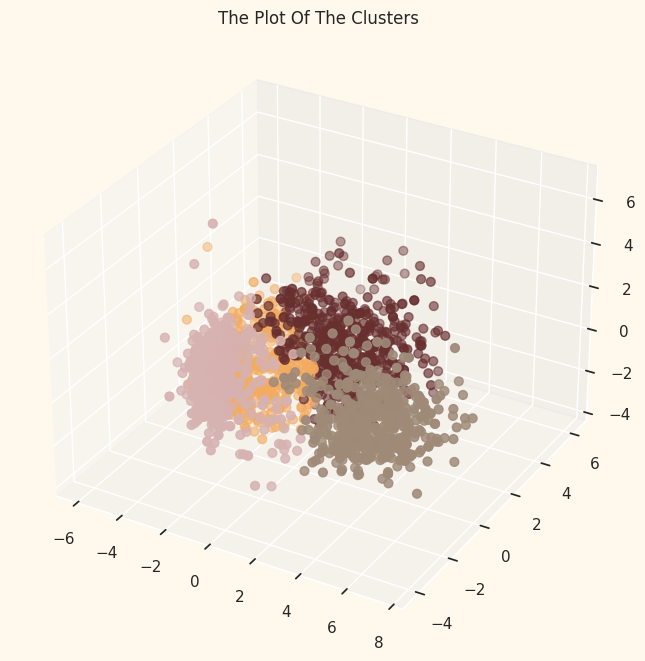

In [ ]:
# Plotting the clusters

fig = plt.figure(figsize=(10,8))
# Creating a new figure for the 3D plot with a size of 10x8 inches.
# Why: Ensures the plot is large and clear enough for effective visualization.
# Benefit: Provides enough space for visualizing clusters in 3D without crowding.

ax = plt.subplot(111, projection='3d', label="bla")
# Adding a 3D subplot to the figure.
# '111' = 1 row, 1 column, first subplot; 'projection="3d"' allows 3D plotting.
# Benefit: Enables plotting data in 3 dimensions (x, y, z).
# Note: 'label="bla"' is not typically needed here; it can be removed unless required for legend handling.

ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
# Plotting the data points in 3D space with:
# x, y, z coordinates from PCA components,
# size of each point set to 40,
# color (`c`) set based on cluster labels,
# circular markers ('o'),
# colormap (`cmap`) to color clusters differently.
# Why: Visually distinguishes clusters using colors.
# Benefit: Makes it easy to identify cluster separation and distribution in reduced 3D space.

ax.set_title("The Plot Of The Clusters")
# Setting the title of the 3D plot.
# Why: Adds context and clarity to the visualization.
# Benefit: Helps the viewer quickly understand what the plot represents.

plt.show()
# Renders and displays the plot.
# Why: Final step to output the visual.
# Benefit: Allows user to visually interpret the clustering results.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code visualizes the clustered data in 3D using PCA-reduced coordinates and color-coded cluster labels.
# It helps in **visually validating** whether the clusters are **clea**


<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustring**

/tmp/ipython-input-24-2841158398.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette=pal)


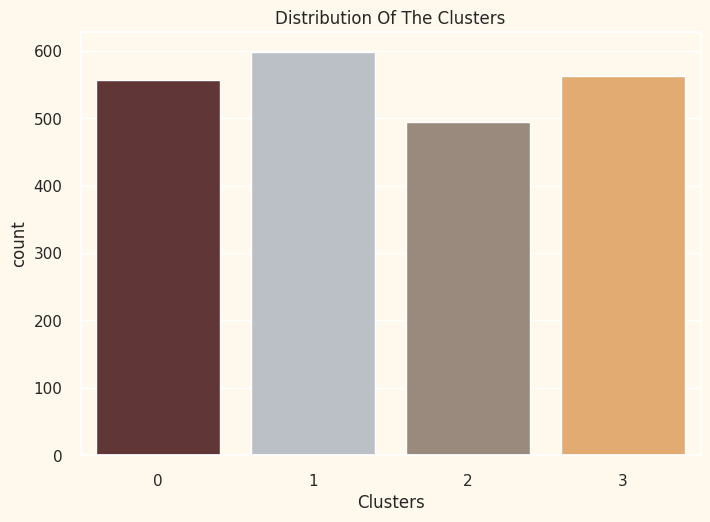

In [ ]:
# Plotting countplot of clusters

pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
# Defining a custom color palette for the clusters.
# Why: Makes the plot visually appealing and ensures each cluster has a unique color.
# Benefit: Improves readability and aesthetics of the plot.

pl = sns.countplot(x=data["Clusters"], palette=pal)
# Creating a bar plot showing the count of data points in each cluster using Seaborn.
# 'x=data["Clusters"]' groups the data by cluster labels.
# Why: Helps to quickly see how many points belong to each cluster.
# Benefit: Provides insights into cluster size distribution (balanced vs. unbalanced).

pl.set_title("Distribution Of The Clusters")
# Adding a title to the count plot.
# Why: Describes what the plot is showing.
# Benefit: Improves clarity for readers or viewers of the graph.

plt.show()
# Displays the count plot.
# Why: Necessary to render the graph.
# Benefit: Lets user visually interpret the cluster sizes.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code generates a **bar chart showing how many data points belong to each cluster**.
# It helps assess whether clusters are evenly sized or if some are significantly larger/smaller,
# which is important for evaluating the quality and balance of clustering results.


The clusters seem to be fairly distributed.

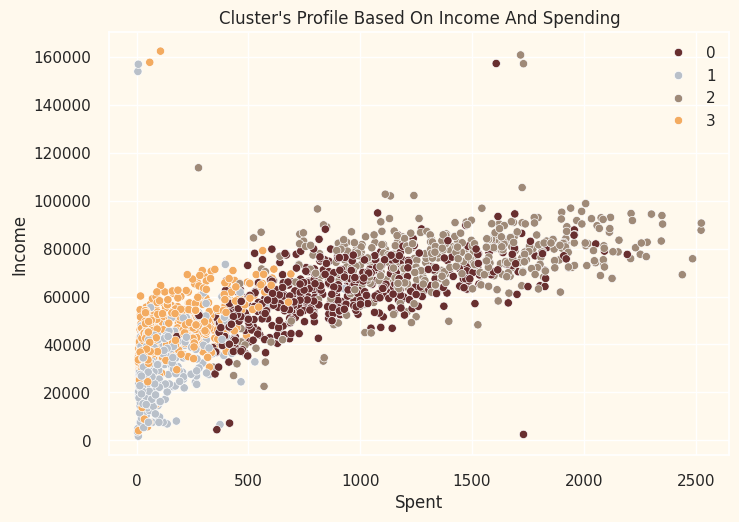

In [ ]:
pl = sns.scatterplot(data=data, x=data["Spent"], y=data["Income"], hue=data["Clusters"], palette=pal)
# Creating a scatter plot using Seaborn to show how customers are grouped based on spending and income.
# 'x' axis is the 'Spent' column, 'y' axis is the 'Income' column.
# 'hue' is used to color the points based on their assigned cluster from clustering algorithm.
# 'palette' assigns specific colors to each cluster using the previously defined list.
# Why: To visualize how different clusters compare in terms of income and spending behavior.
# Benefit: Helps in understanding the financial profile of each cluster — e.g., high income/low spending, etc.

pl.set_title("Cluster's Profile Based On Income And Spending")
# Setting the title of the scatter plot.
# Why: Makes the purpose of the plot immediately clear.
# Benefit: Helps the viewer quickly understand what the plot is illustrating.

plt.legend()
# Displays the legend indicating which color corresponds to which cluster.
# Why: To identify and distinguish between clusters in the plot.
# Benefit: Makes the plot interpretable and meaningful.

plt.show()
# Displays the scatter plot.
# Why: Necessary to actually render the visual on screen.
# Benefit: Allows user to analyze customer clusters visually.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code visualizes customer clusters based on their **income vs. spending** patterns.
# It helps identify behavioral segments like "high income high spenders" or "low income low spenders",
# making it useful for **targeted marketing, segmentation, and strategy planning**.


**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipython-input-26-1319779053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
/usr/local/lib/python3.11/dist-packages/sea

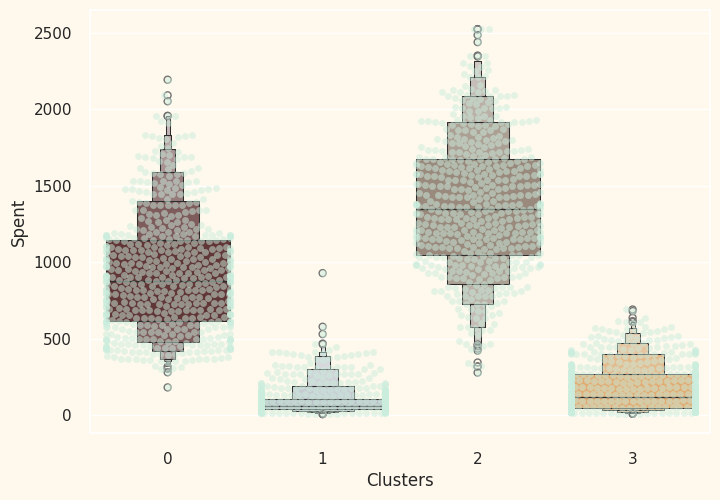

In [ ]:
plt.figure()
# Creates a new figure for the plot.
# Why: Starts a fresh canvas for plotting.
# Benefit: Prevents overlap with previous plots and ensures clean output.

pl = sns.swarmplot(x=data["Clusters"], y=data["Spent"], color="#CBEDDD", alpha=0.5)
# Plots a swarm plot where each dot represents a data point's 'Spent' value within its cluster.
# 'color' sets the color of the dots; 'alpha=0.5' makes them semi-transparent.
# Why: Provides detailed view of individual spending patterns in each cluster.
# Benefit: Shows the distribution and density of spending per cluster clearly without overlap.

pl = sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
# Adds a boxen plot (variation of a box plot) over the swarm plot.
# Boxen plot shows the distribution, median, quartiles, and outliers more effectively—especially for larger datasets.
# Why: Gives a statistical summary (spread, median, etc.) of 'Spent' within each cluster.
# Benefit: Helps quickly compare central tendency and spread of spending across clusters.

plt.show()
# Displays the final combined plot (swarm + boxen).
# Why: Necessary to render the visualization.
# Benefit: Enables visual inspection and comparison of spending behavior cluster-wise.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code visually compares the **spending patterns across clusters** using both swarm and boxen plots.
# The swarm plot shows **individual data points**, while the boxen plot provides a **summary of distribution**.
# This dual-layered plot helps in **understanding variability, central tendency, and outliers** in spending for each customer cluster,
# which is valuable for business decisions like pricing, targeting, or offers.


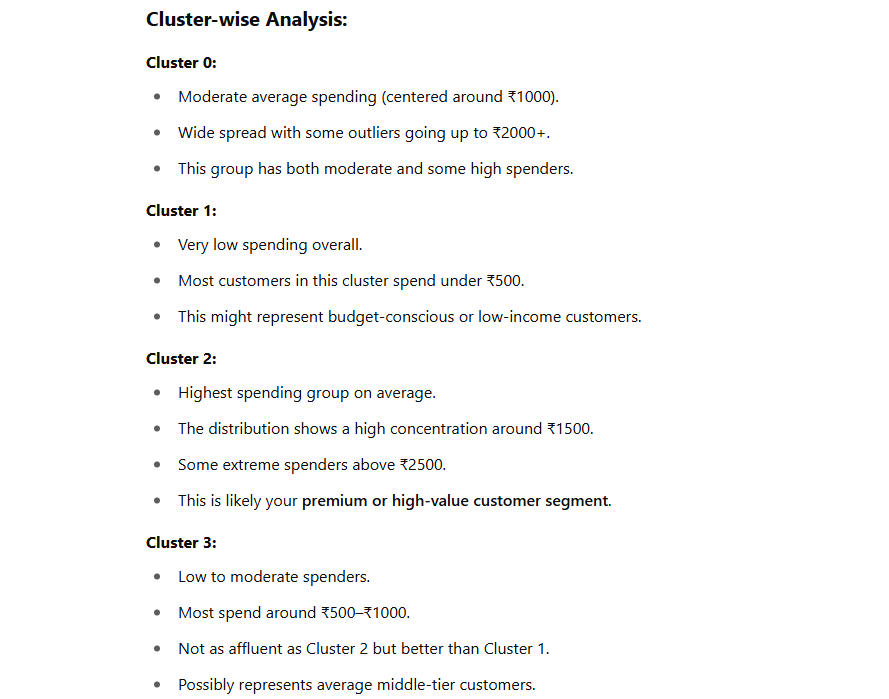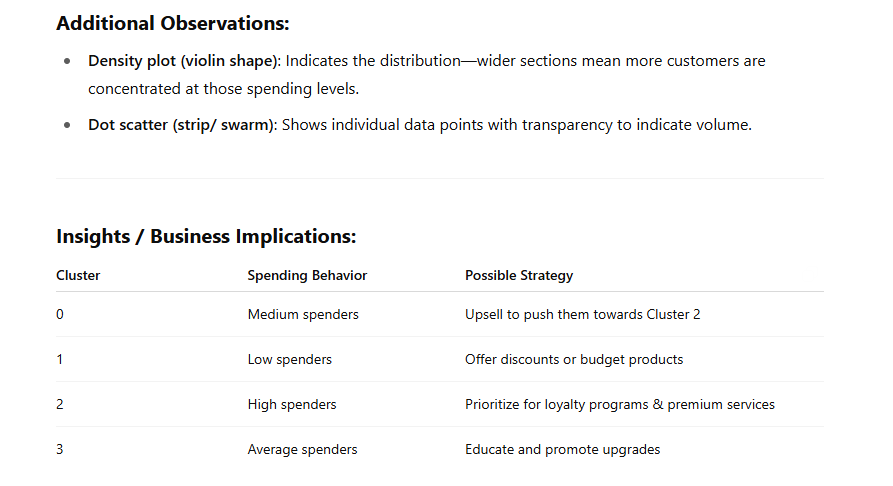

Let us next explore how did our campaigns do in the past.

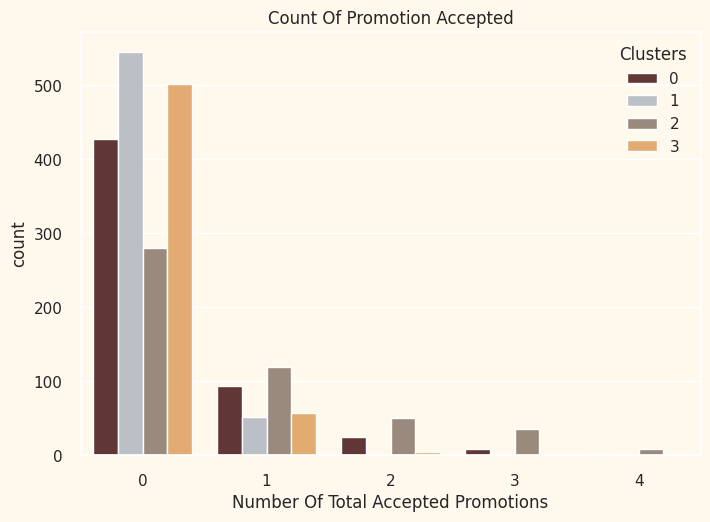

In [ ]:
# Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
# Summing up the values from five promotional campaign columns to create a new feature 'Total_Promos'.
# Why: Each 'AcceptedCmp' column indicates if a customer accepted a particular campaign (1 for yes, 0 for no).
# Benefit: The new column shows the total number of promotions accepted by each customer,
# which helps analyze customer engagement and responsiveness to marketing.

# Plotting count of total campaign accepted.
plt.figure()
# Creates a new figure for the upcoming plot.
# Why: Ensures the plot appears on a clean canvas.
# Benefit: Prevents overlap with earlier plots for clarity.

pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=pal)
# Creates a bar chart showing how many customers accepted 0, 1, 2...5 campaigns, colored by their cluster.
# 'x' is the total number of accepted promotions.
# 'hue' is used to differentiate clusters by color.
# Why: Helps understand how promotion acceptance varies across clusters.
# Benefit: Useful to identify which cluster of customers are more marketing responsive or active.

pl.set_title("Count Of Promotion Accepted")
# Sets the title of the chart.
# Why: Clearly labels the purpose of the plot.
# Benefit: Makes the plot easy to interpret.

pl.set_xlabel("Number Of Total Accepted Promotions")
# Sets the label for the x-axis.
# Why: Helps viewers understand what the x-axis values represent.
# Benefit: Improves clarity and readability of the plot.

plt.show()
# Displays the final plot.
# Why: Renders the chart so that it can be visually analyzed.
# Benefit: Enables pattern recognition across clusters based on promotional engagement.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code creates a new feature representing how many total marketing campaigns each customer accepted,
# and visualizes how this behavior varies across different customer clusters.
# It helps identify which clusters are **more engaged**, **more responsive to marketing**, or **potentially loyal**,
# aiding in targeted marketing strategies and customer segmentation.


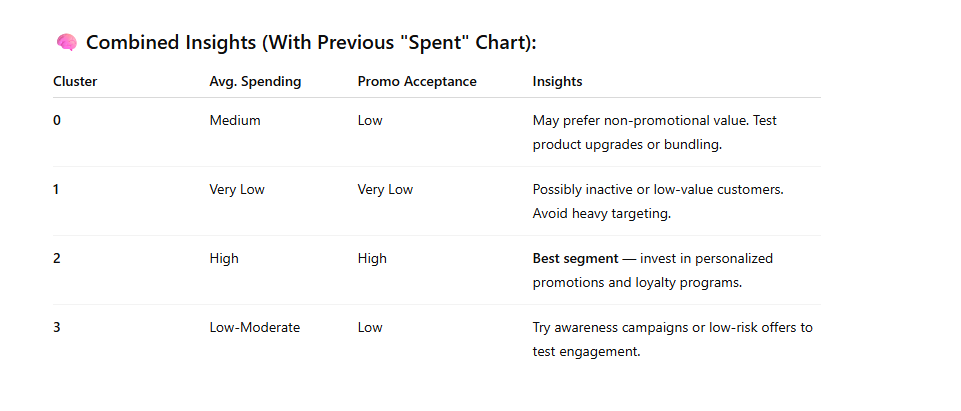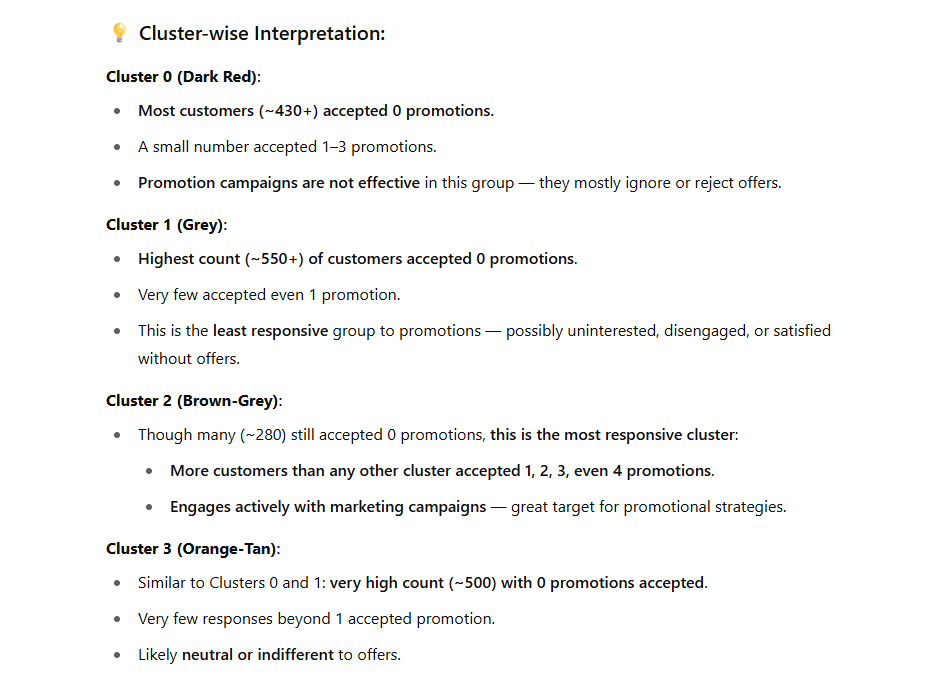

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.


/tmp/ipython-input-28-964657549.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=pal)


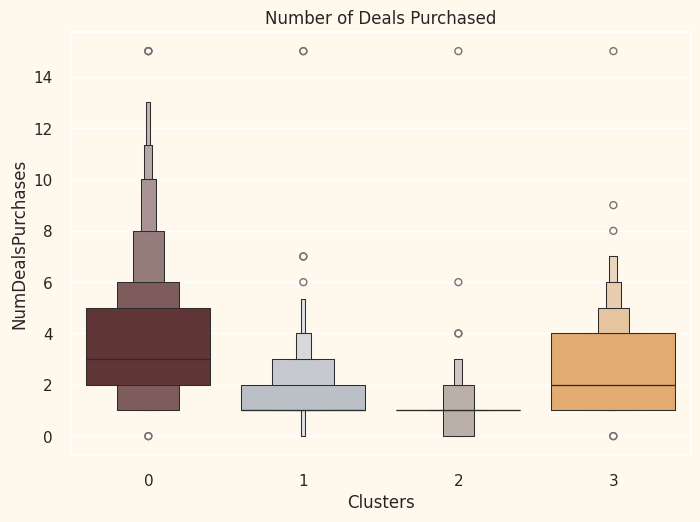

In [ ]:
# Plotting the number of deals purchased

plt.figure()
# Creates a new figure for the plot.
# Why: Ensures the upcoming plot starts fresh and doesn't overlap with previous visuals.
# Benefit: Maintains clarity and separation between different visualizations.

pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=pal)
# Creates a boxen plot to show the distribution of 'NumDealsPurchases' for each cluster.
# 'y' is the number of deals purchased, 'x' is the cluster label.
# 'palette' sets custom colors for each cluster.
# Why: Boxen plot gives a deeper view of the distribution, especially for large datasets and skewed data.
# Benefit: Helps compare deal-purchasing behavior across clusters, including spread, outliers, and central trends.

pl.set_title("Number of Deals Purchased")
# Adds a title to the plot.
# Why: Clearly states what the plot is about.
# Benefit: Makes the plot easily understandable to viewers or readers.

plt.show()
# Renders the final visualization.
# Why: Required to display the plot in the output.
# Benefit: Enables visual comparison of how different clusters purchase promotional deals.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This code visualizes the **distribution of the number of deals purchased** by customers across different clusters.
# It helps identify whether certain customer groups are **more responsive to deals**, which is useful for
# crafting personalized offers and understanding purchasing tendencies within clusters.


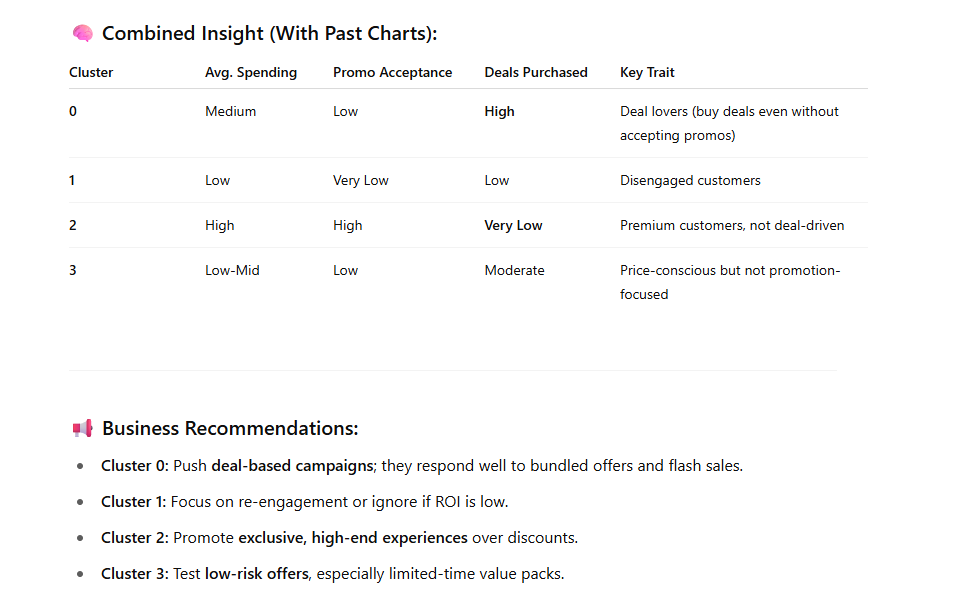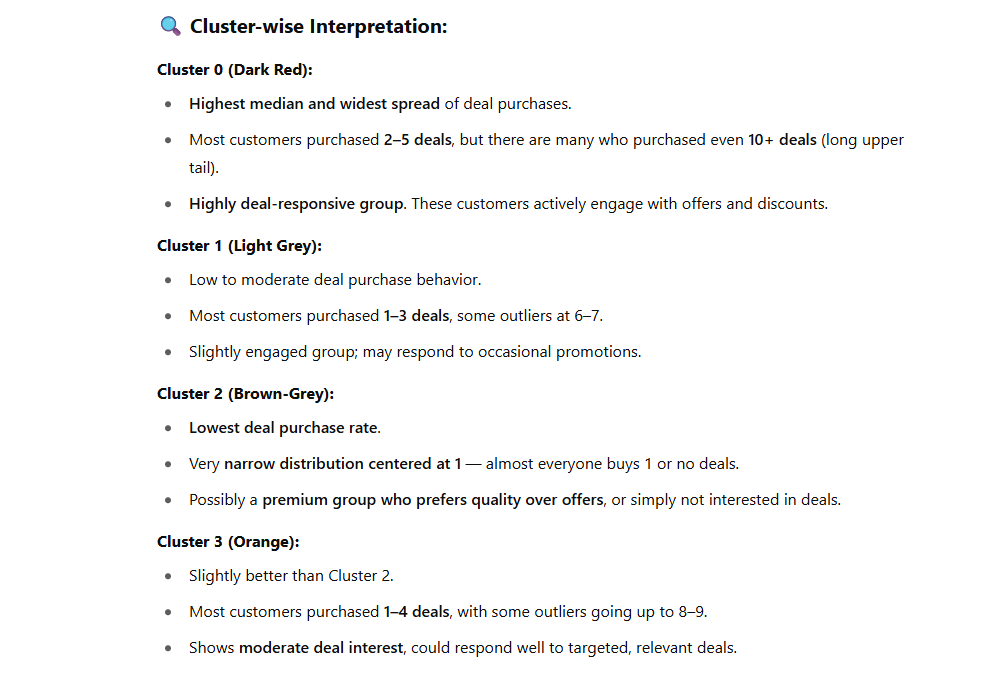

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3.
However, our star customers cluster 1 are not much into the deals.
Nothing seems to attract cluster 2 overwhelmingly


<Figure size 800x550 with 0 Axes>

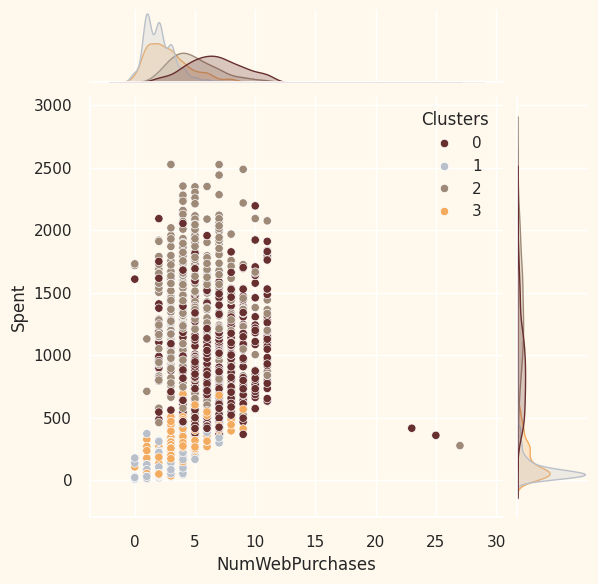

<Figure size 800x550 with 0 Axes>

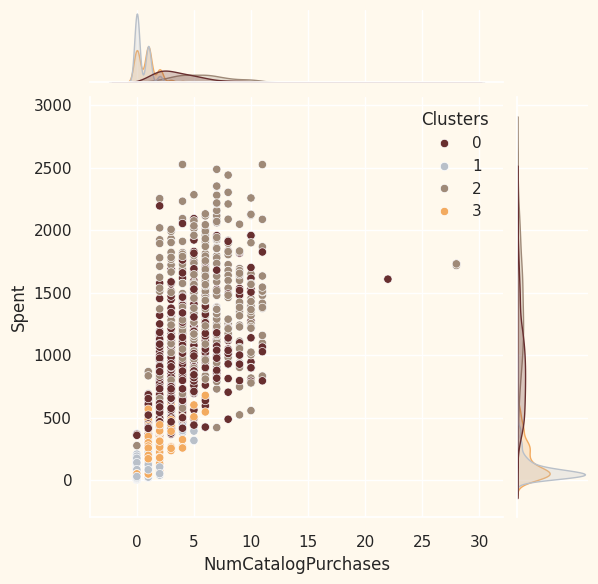

<Figure size 800x550 with 0 Axes>

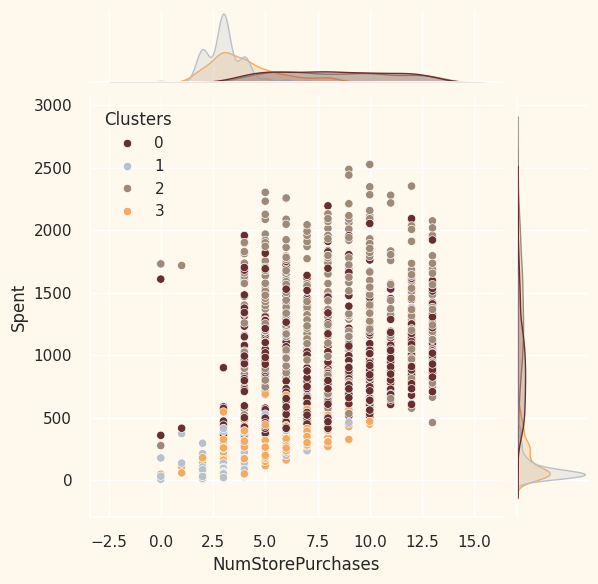

<Figure size 800x550 with 0 Axes>

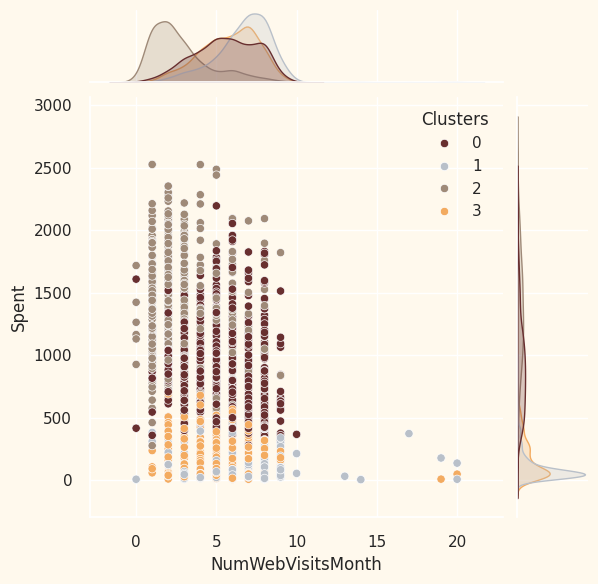

In [ ]:
# For more details on the purchasing style

Places = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
# Creating a list of features that represent different types of customer interactions or purchase channels:
# - Web purchases
# - Catalog purchases
# - In-store purchases
# - Website visits per month
# Why: These features reflect customer behavior and channel preferences.
# Benefit: Helps to analyze and compare purchase patterns across different platforms.

for i in Places:
    # Looping through each feature in the 'Places' list.
    # Why: To generate a separate visualization for each type of purchase behavior.
    # Benefit: Automates the plotting process for multiple features, saving time and code repetition.

    plt.figure()
    # Creates a new figure for each feature’s plot.
    # Why: Prevents plots from overlapping and keeps them clean.
    # Benefit: Ensures each joint plot appears clearly and separately.

    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], palette=pal)
    # Creates a joint plot showing the relationship between a specific purchase type (x) and spending (y),
    # colored by cluster labels.
    # Why: To explore how spending behavior relates to each purchase channel across different clusters.
    # Benefit: Helps identify patterns like whether high spenders prefer online, catalog, or store purchases,
    # and how this differs between clusters.

    plt.show()
    # Displays the current joint plot.
    # Why: Required to render the plot.
    # Benefit: Allows users to visually interpret the relationship between variables for each cluster.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This block visualizes how customer **spending** is related to **various purchasing channels**
# (web, catalog, in-store, and web visits), broken down by cluster.
# It provides deep insight into **channe**


**1ST IMAGE**
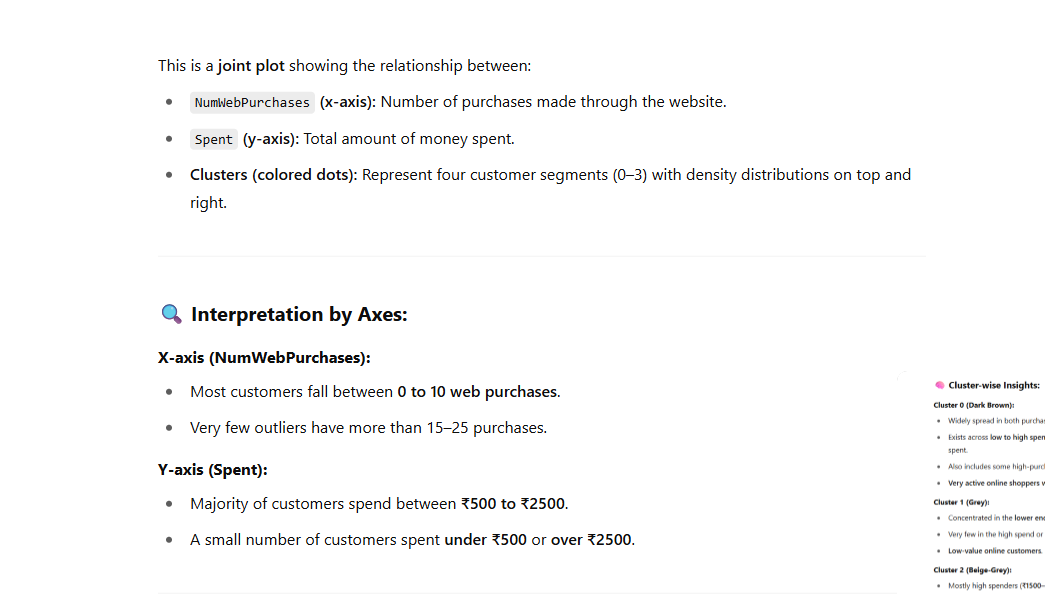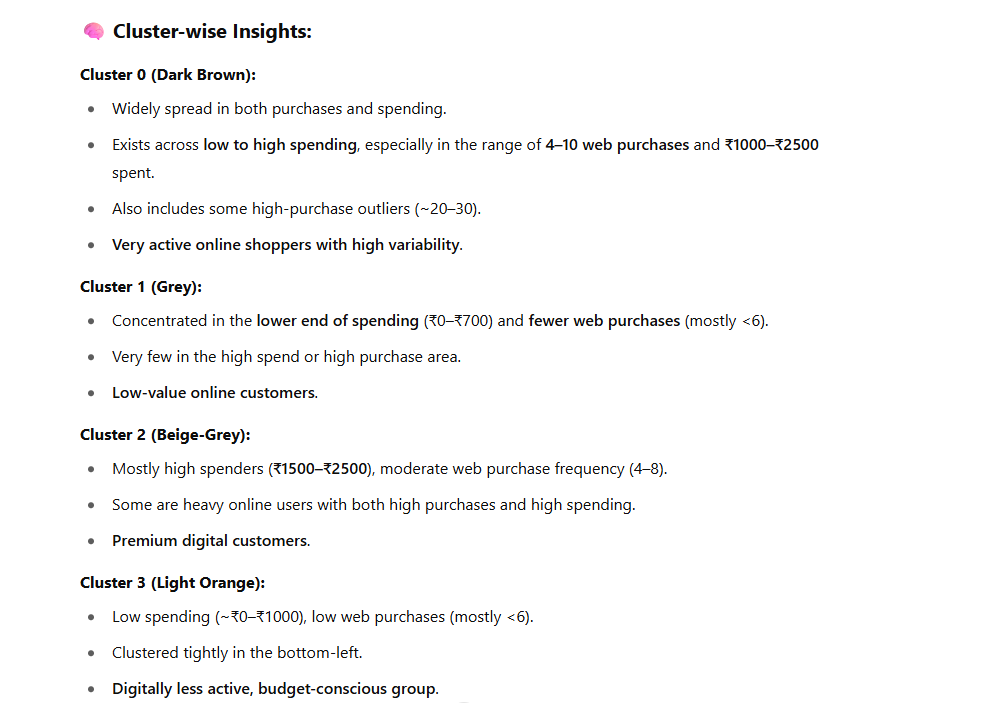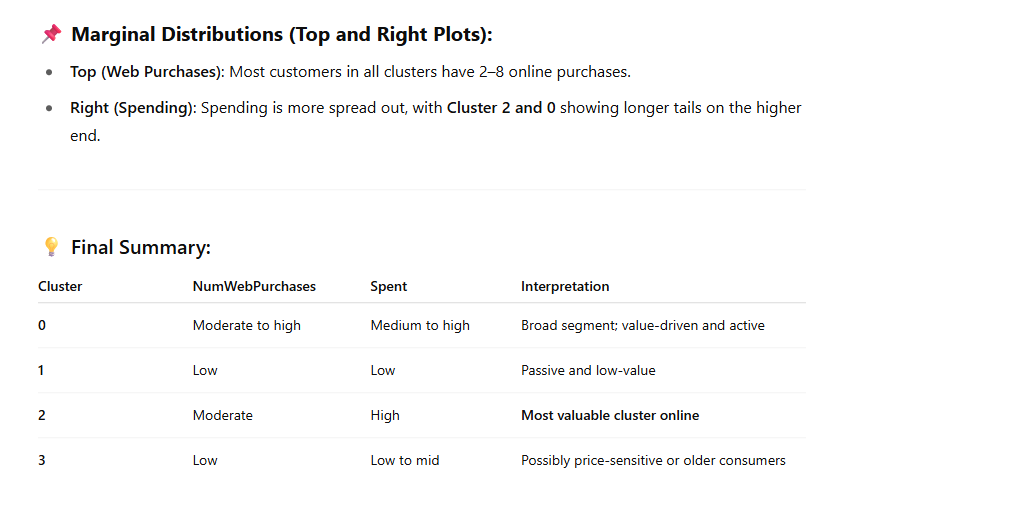

2ND IMAGE

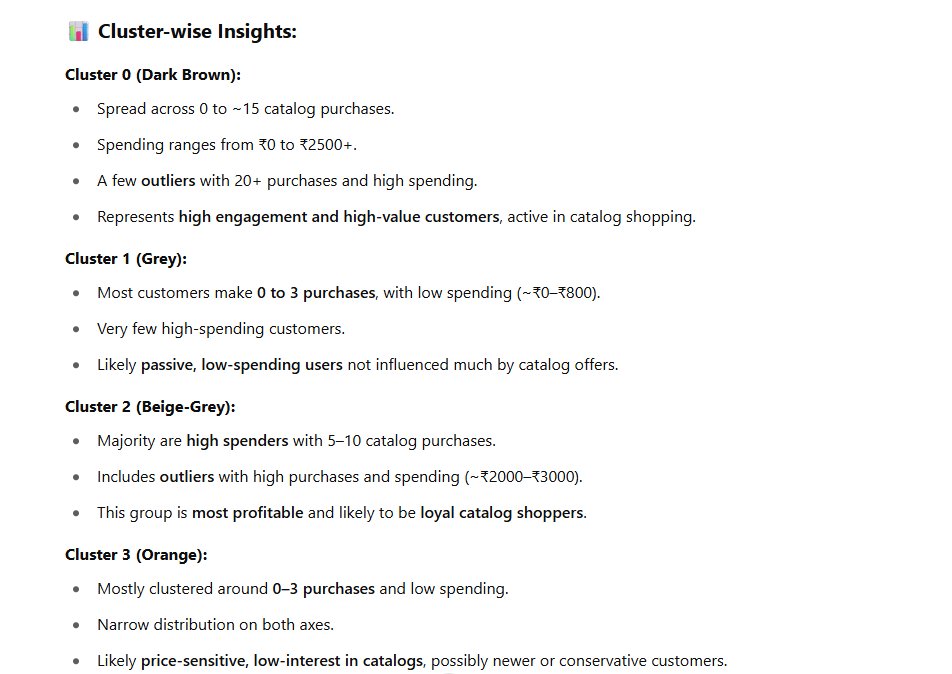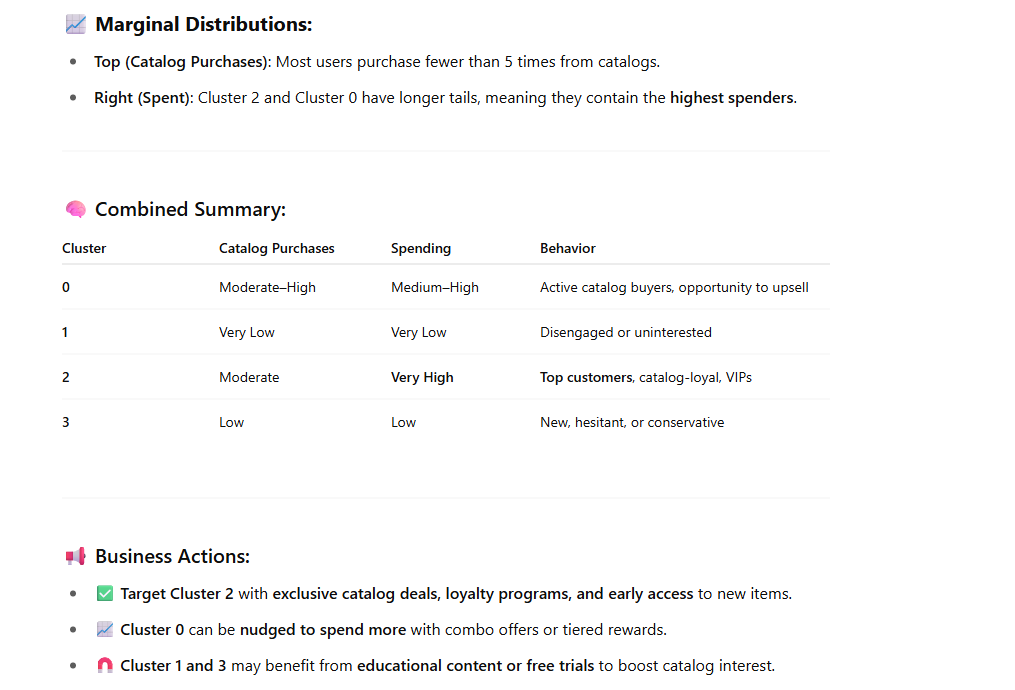

**3RD IMAGE**

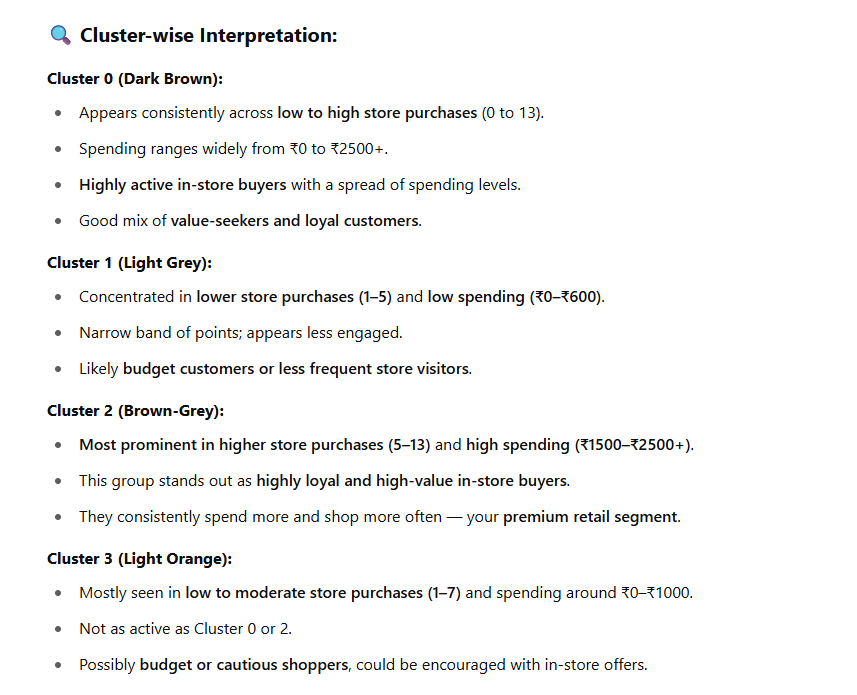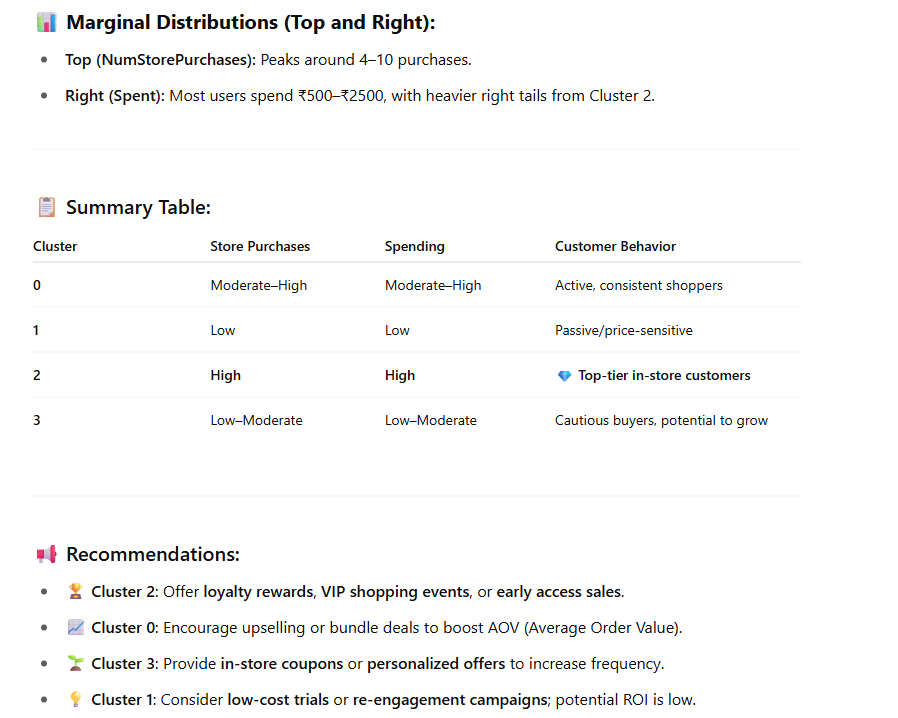

<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Now that we have formed the clusters and looked at their purchasing habits.
Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in.
On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

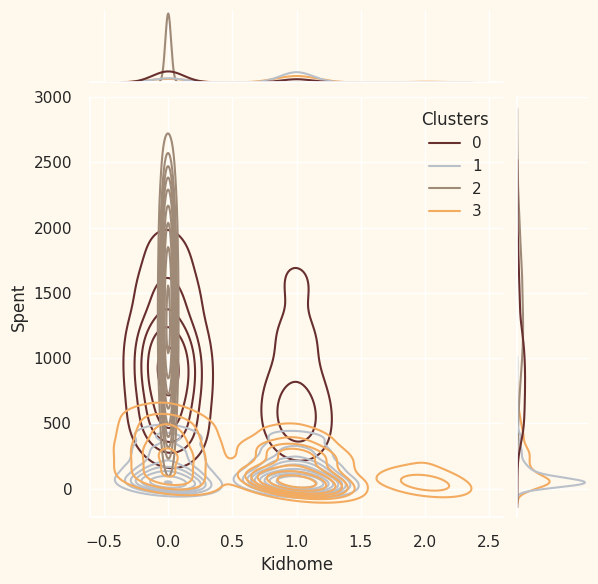

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

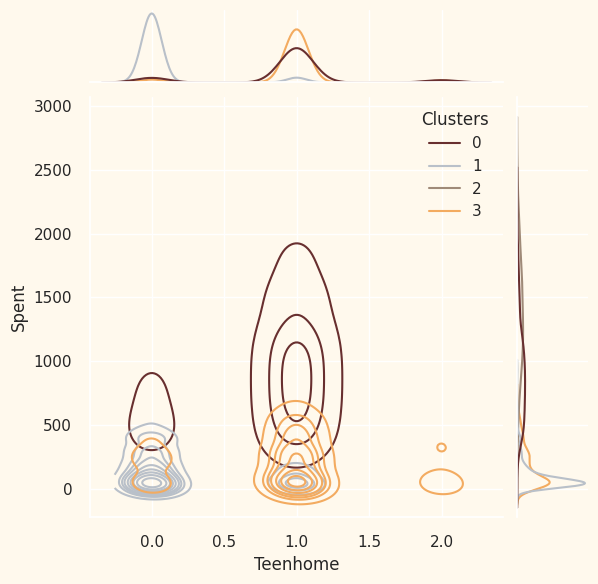

<Figure size 800x550 with 0 Axes>

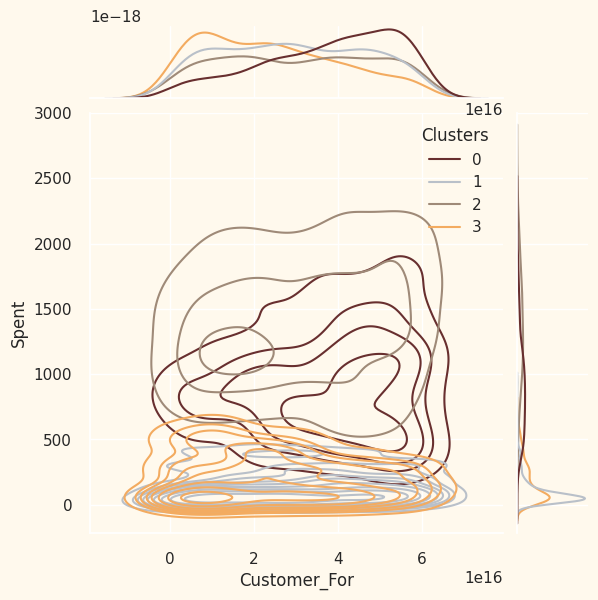

<Figure size 800x550 with 0 Axes>

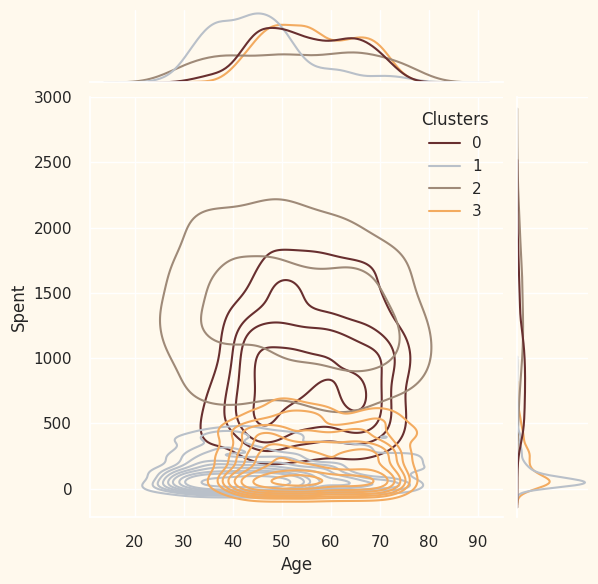

<Figure size 800x550 with 0 Axes>

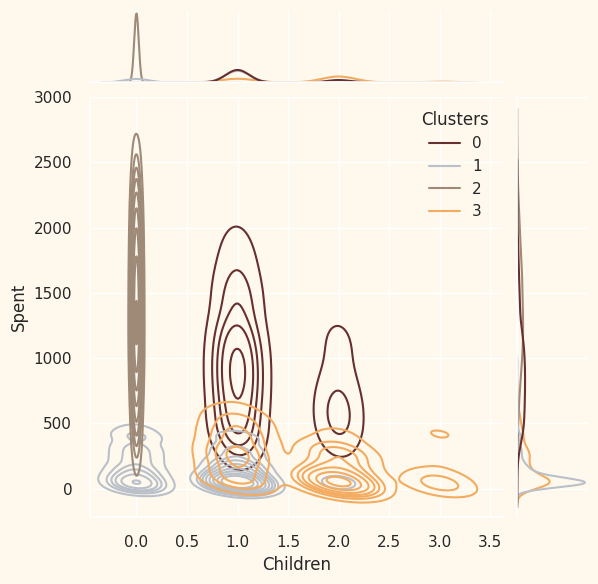

<Figure size 800x550 with 0 Axes>

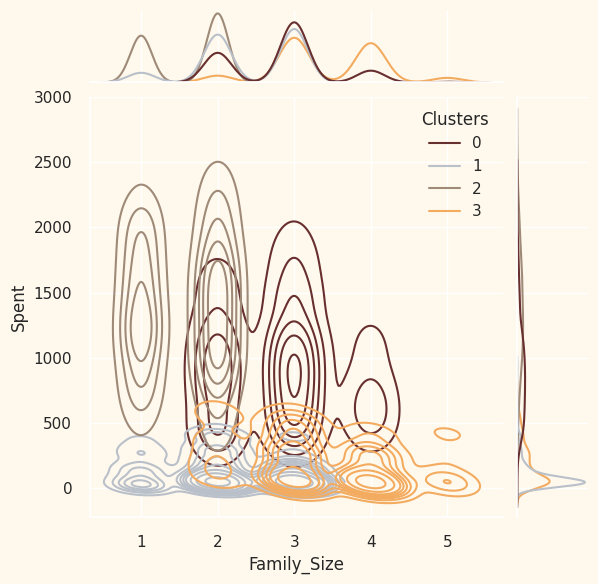

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

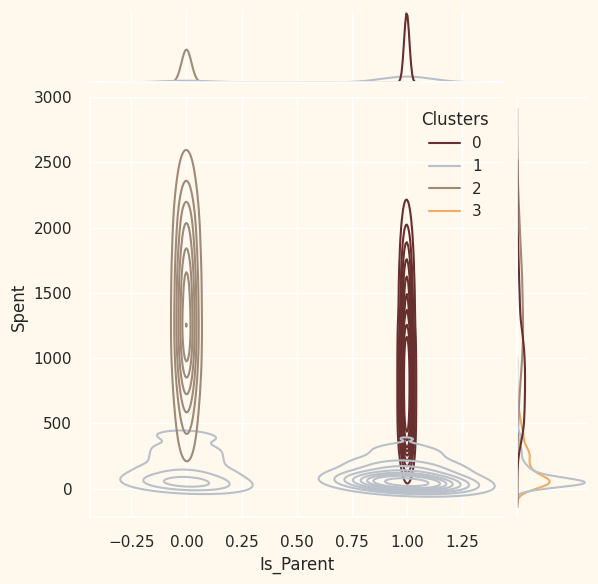

<Figure size 800x550 with 0 Axes>

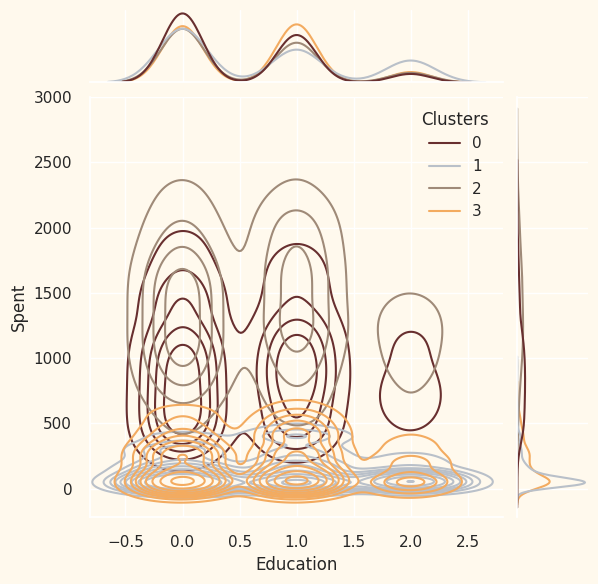

<Figure size 800x550 with 0 Axes>

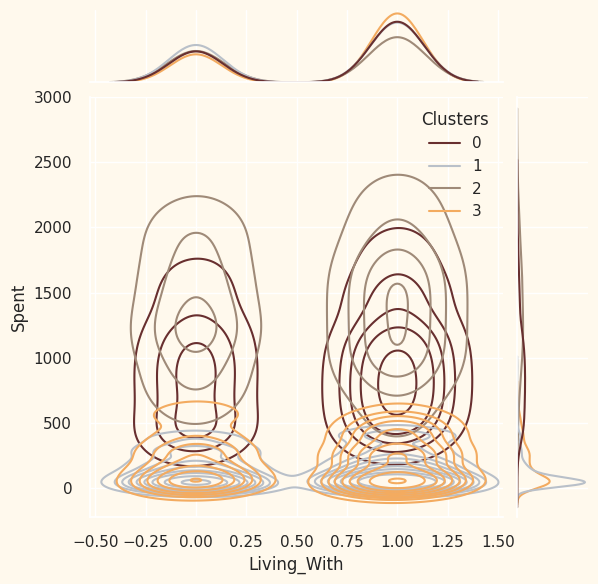

In [ ]:
Personal = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]
# Creating a list of personal and demographic features.
# These include household composition, age, family status, education, and relationship living situation.
# Why: These features impact purchasing behavior and spending capacity.
# Benefit: Enables demographic profiling of customer clusters.

for i in Personal:
    # Looping through each personal/demographic feature in the list.
    # Why: To analyze how each feature correlates with spending, across clusters.
    # Benefit: Automates plotting for multiple features without writing repetitive code.

    plt.figure()
    # Creating a new figure for the current feature.
    # Why: Ensures each joint plot appears clean and separate.
    # Benefit: Prevents plot overlap, improves clarity.

    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=pal)
    # Generating a kernel density estimation (KDE) joint plot for each feature vs. 'Spent'.
    # 'x' is the current personal feature, 'y' is spending.
    # 'hue' differentiates data by clusters using colors.
    # 'kind="kde"' shows smoothed distribution instead of raw points.
    # Why: KDE helps visualize trends and density, especially in continuous/numeric data.
    # Benefit: Makes it easier to understand **how demographic traits relate to spending** across clusters.

    plt.show()
    # Displays the current plot.
    # Why: Necessary for visual output.
    # Benefit: Lets the user interpret the relationship between each personal feature and spending per cluster.

# ----------------------------------------------------
# 🔚 Overall Summary:
# This block explores how **personal and demographic features** (like age, family size, children, education)
# are related to **customer spending**, with cluster-wise distinction.
# Using KDE joint plots allows smooth, intuitive visualization of how spending behavior varies
# based on **life stage, household setup, and education**.
# It helps in **creating detailed customer personas** and targeting strategies based on demographics.


TEEN HOME
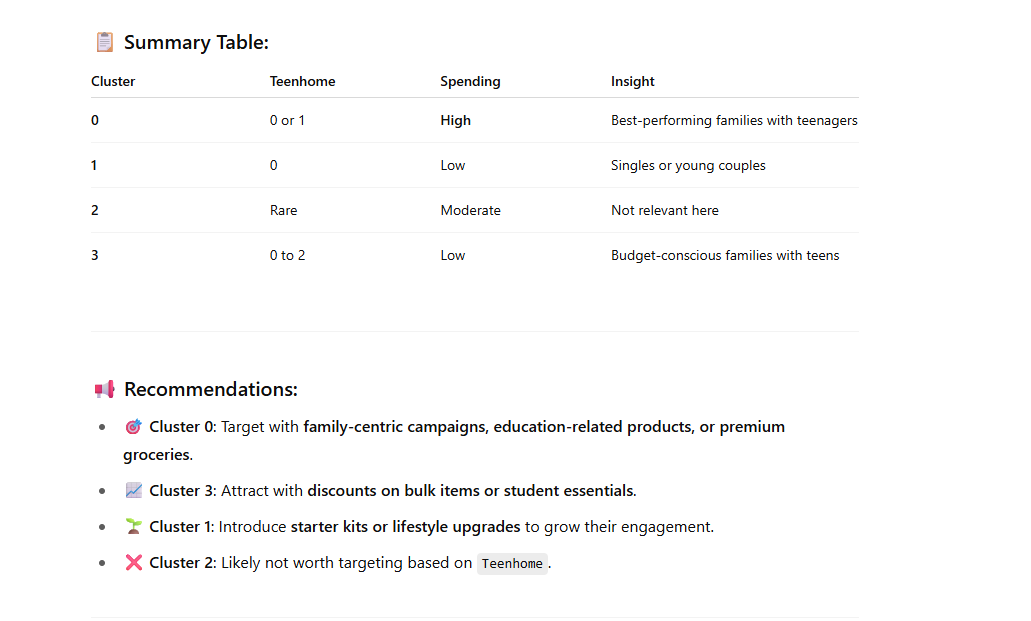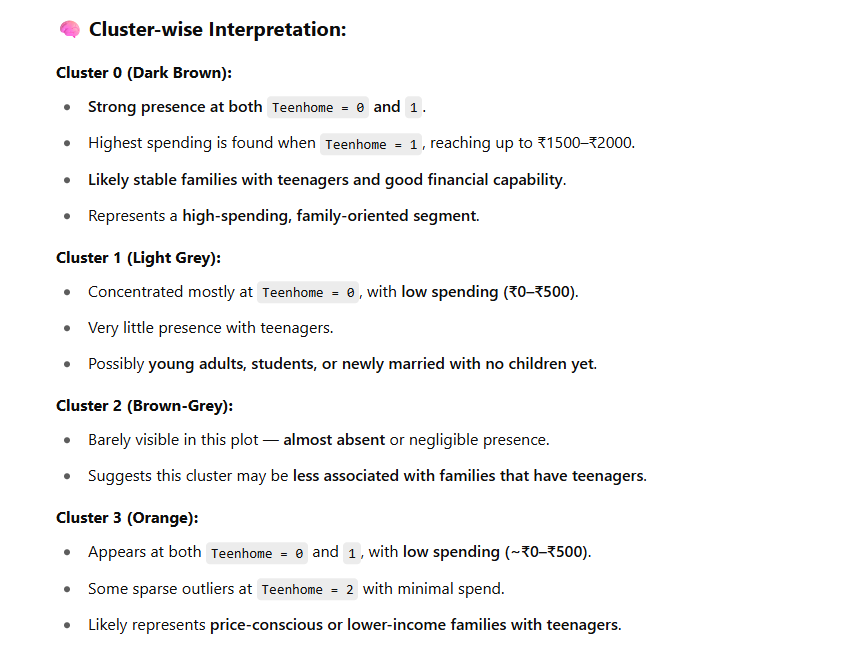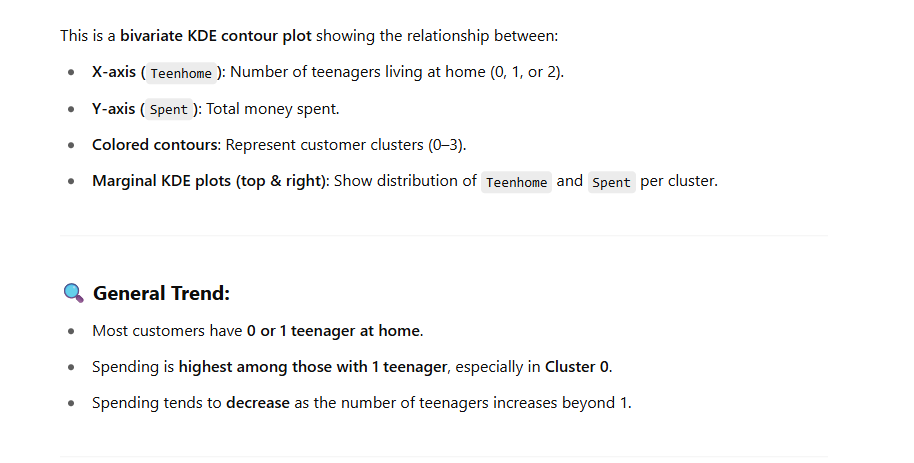

KIDHOME
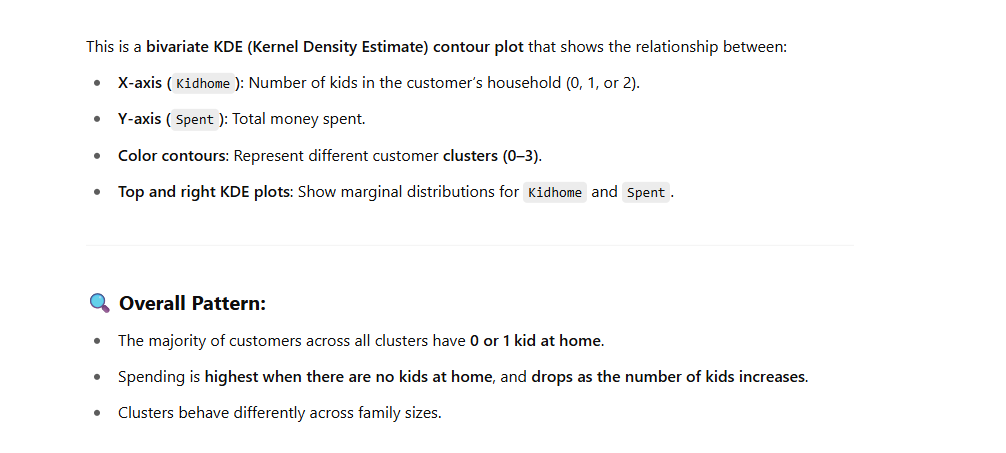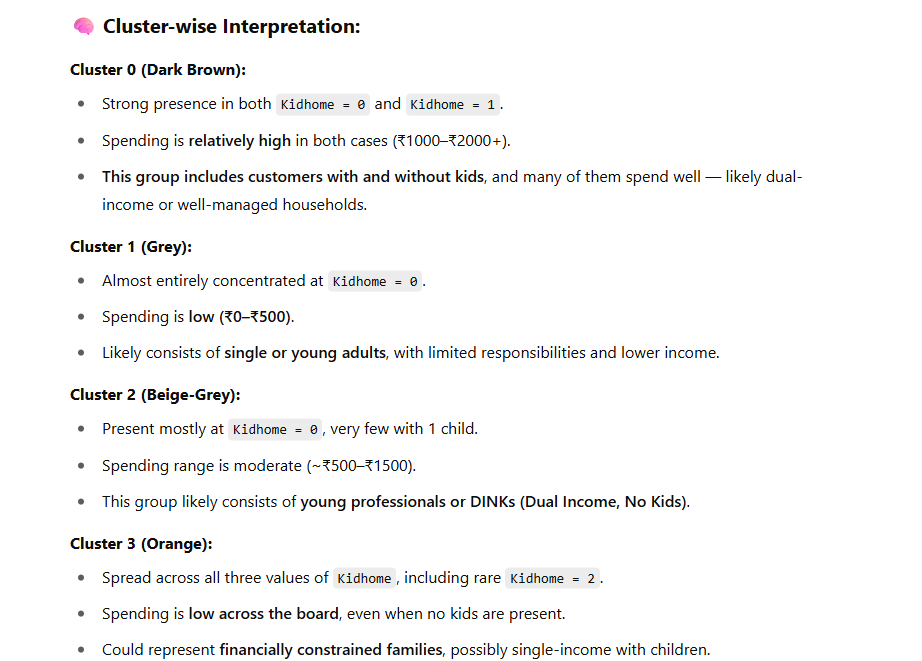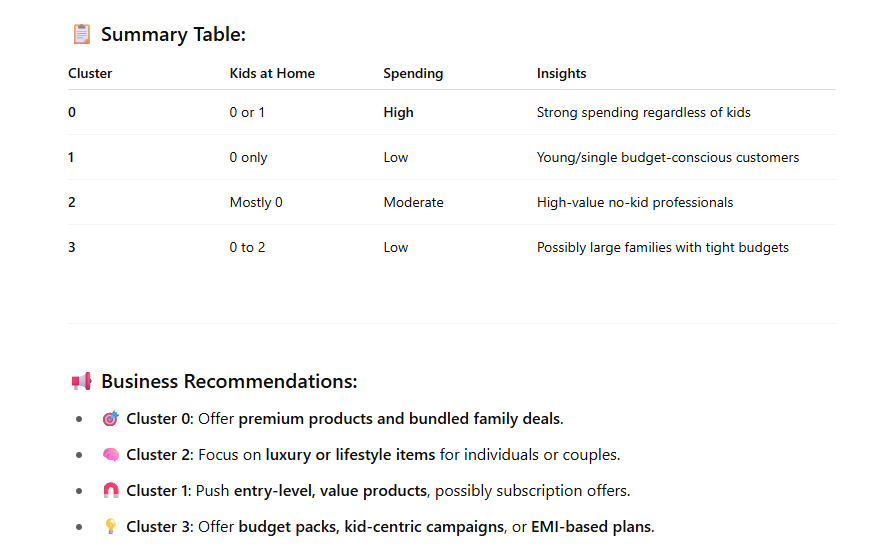

CUSTOMER FOR
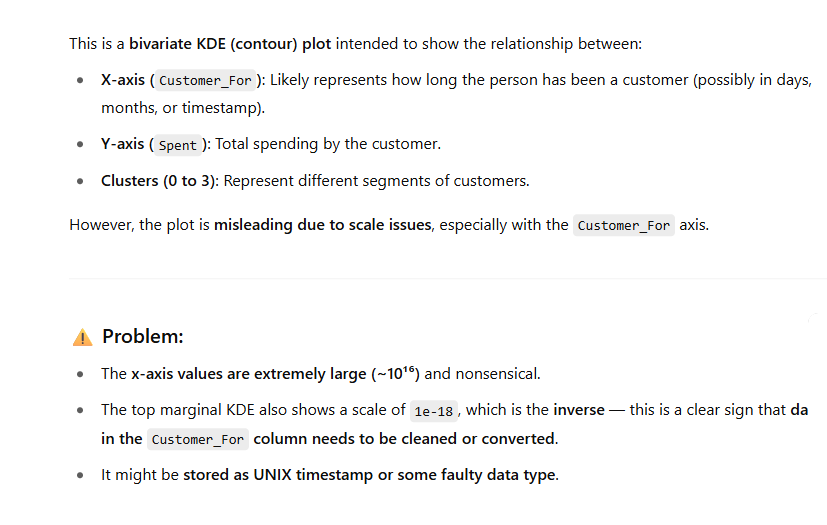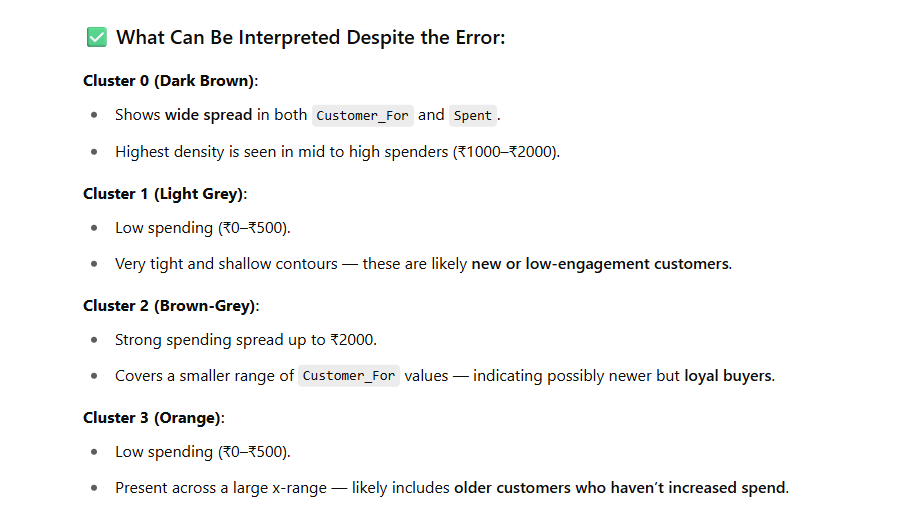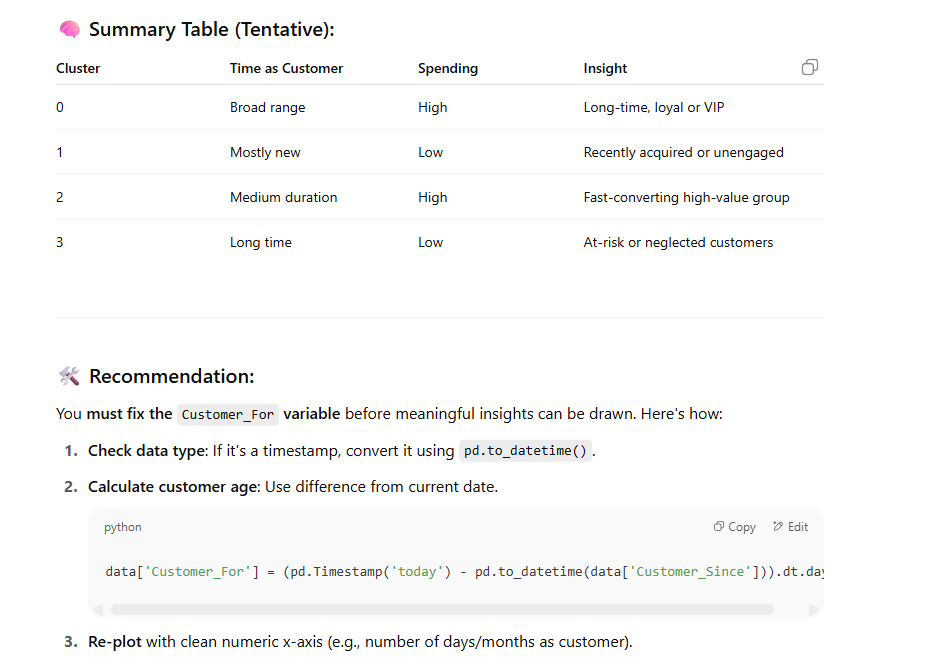

AGE
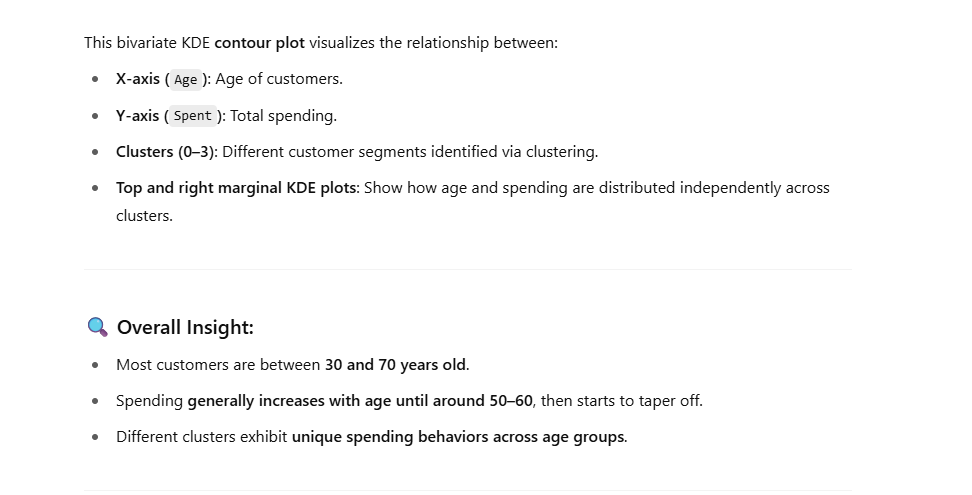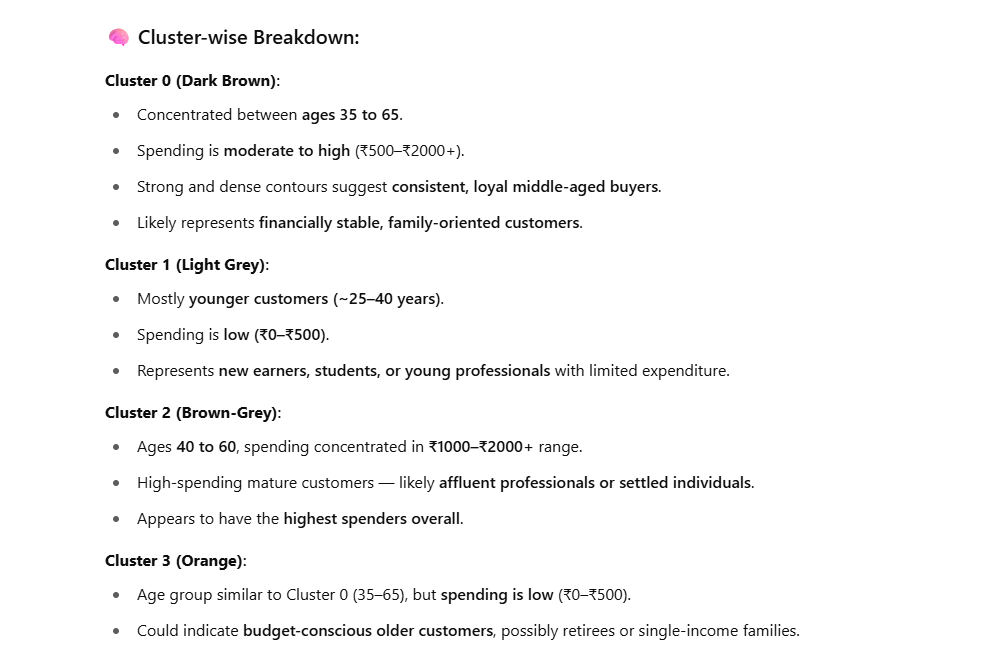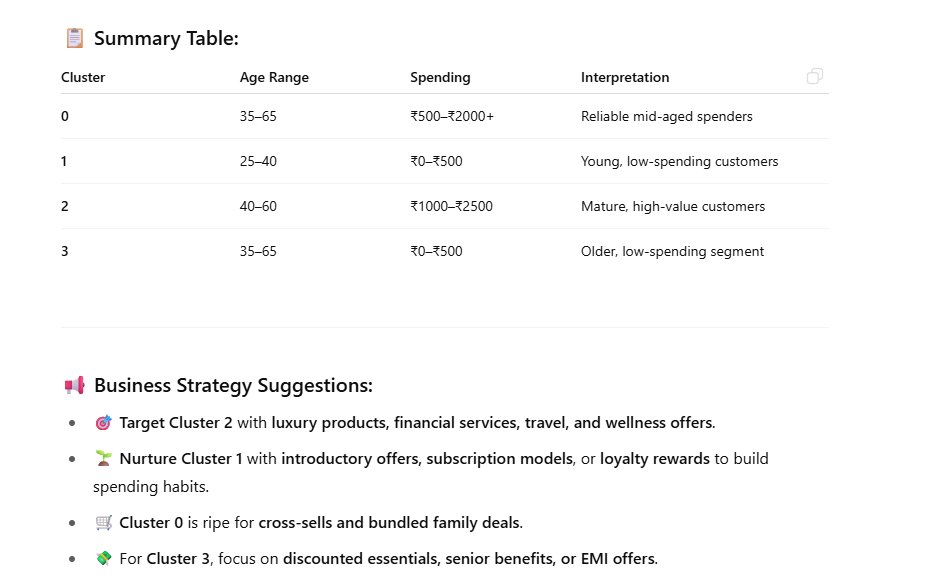

CHILDREN

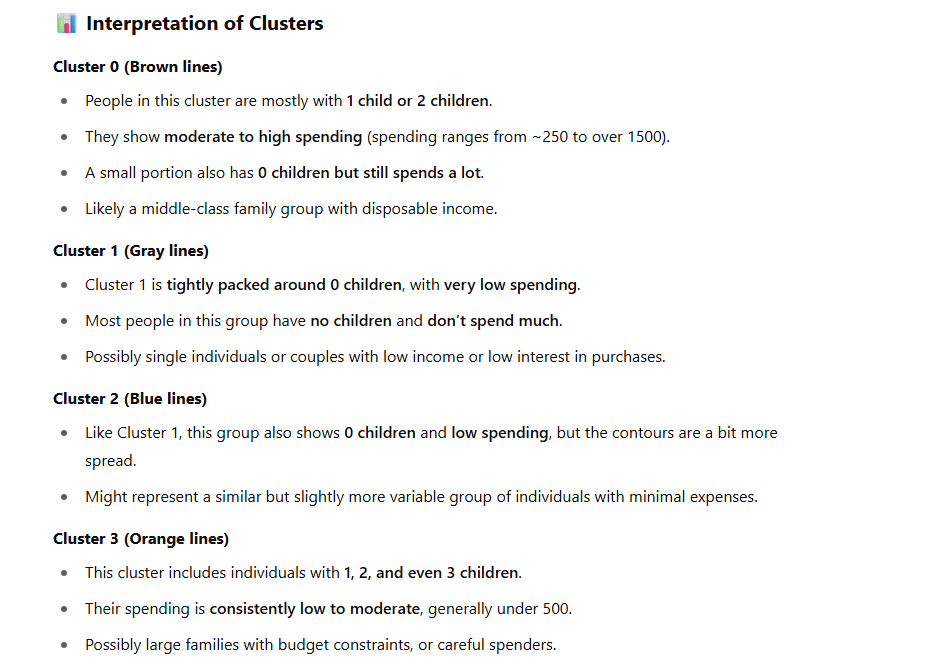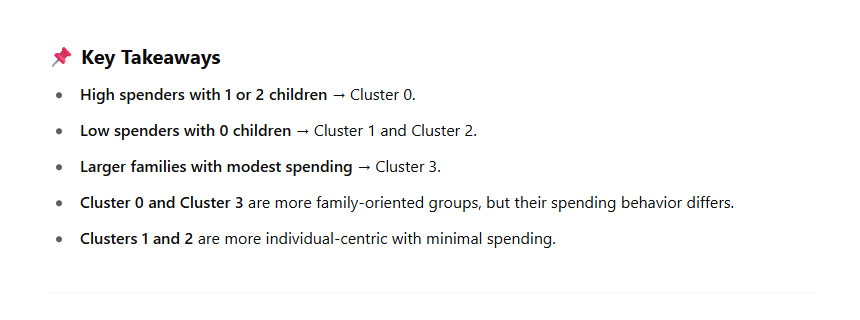

FAMILY SIZE 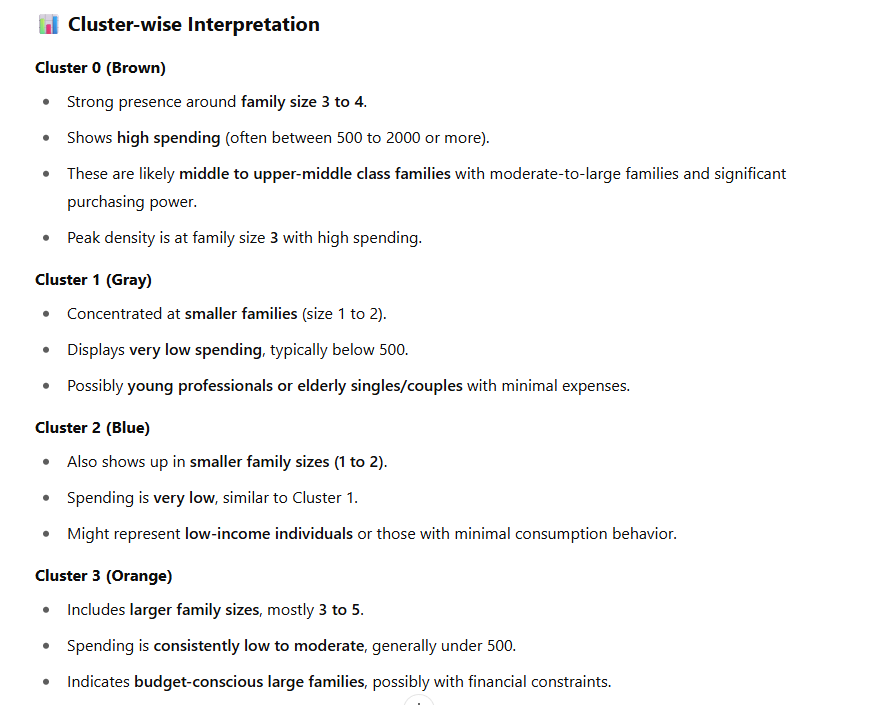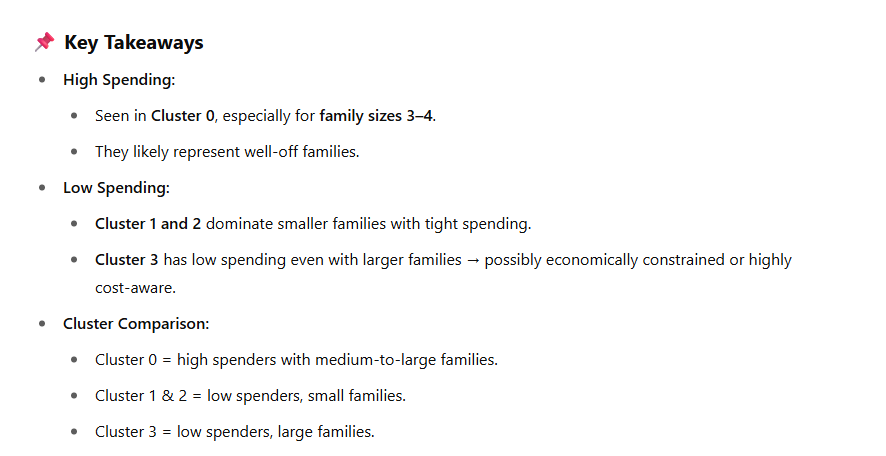

IS PARENT
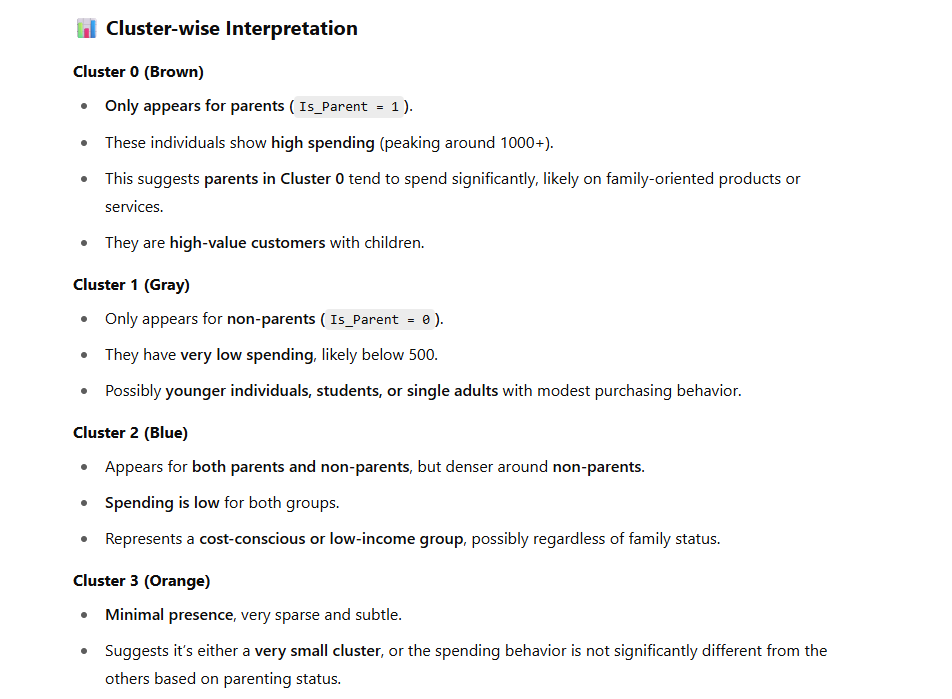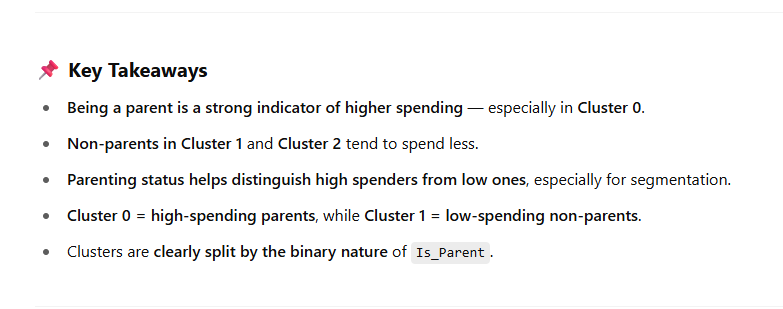

EDUCATION LEVEL
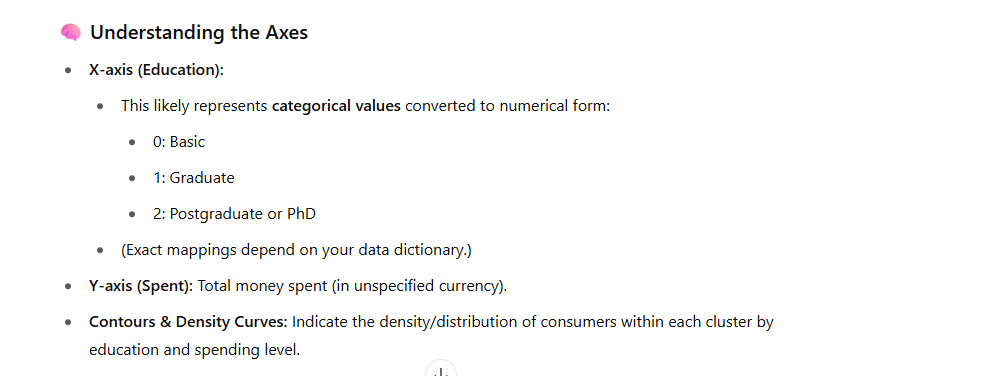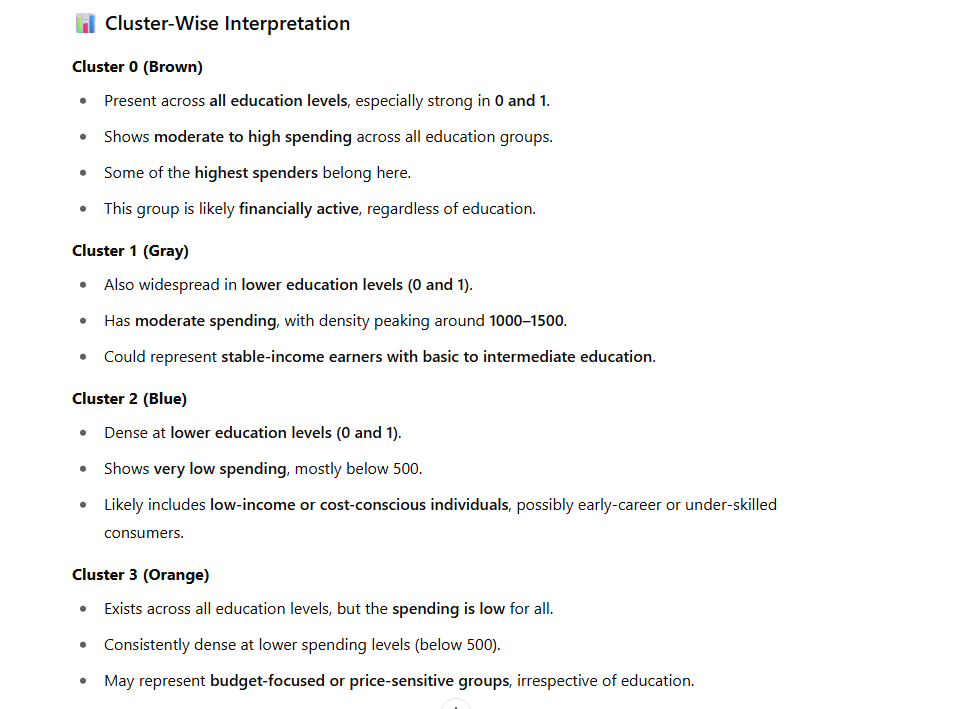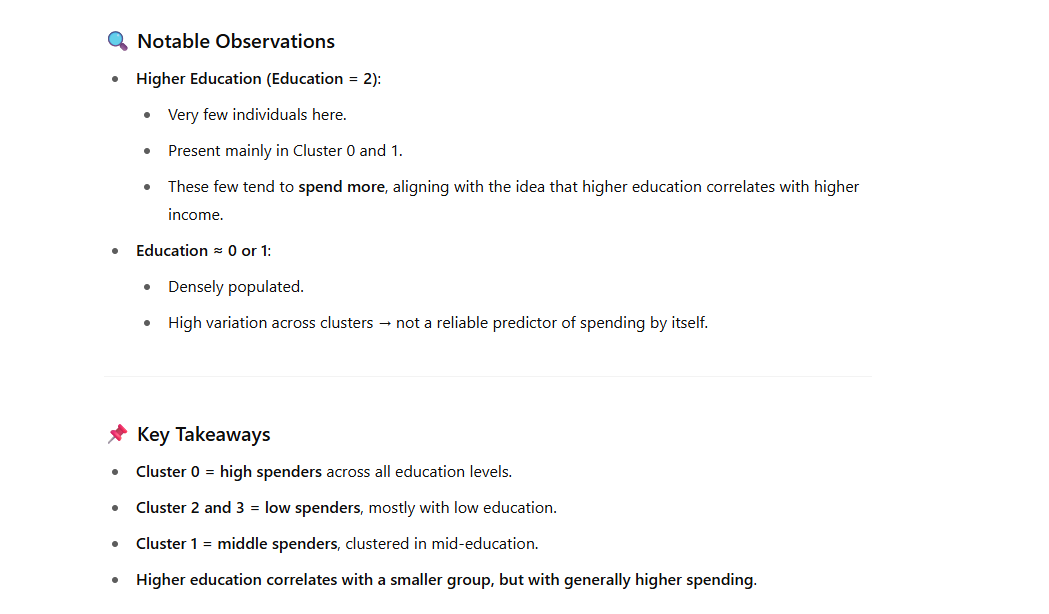

LIVING WITH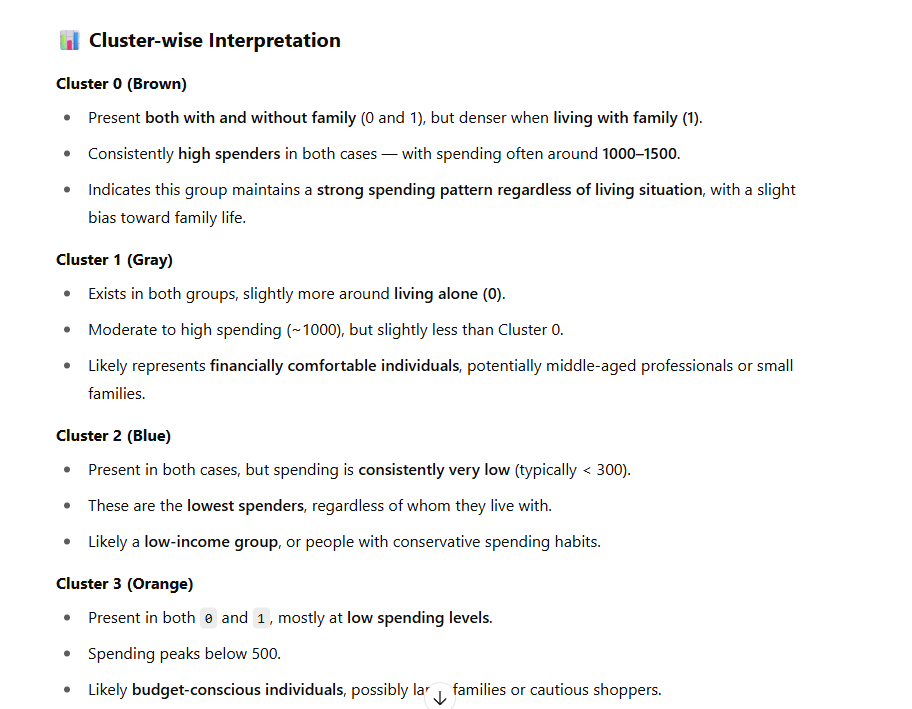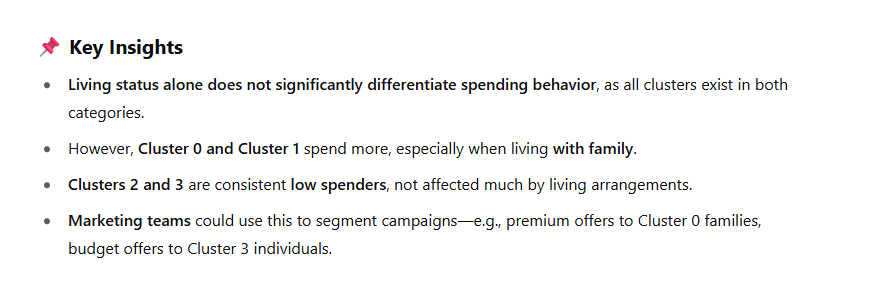

**Points to be noted:**

The following information can be deduced about the customers in different clusters.

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true">
  

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

In this project, I performed unsupervised clustering.
I did use dimensionality reduction followed by agglomerative clustering.
I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending.
This can be used in planning better marketing strategies.

**<span style="color:#682F2F;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#682F2F;">If you have any questions, feel free to comment!</span>**

**<span style="color:#682F2F;"> Best Wishes!</span>**

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>